<div id="teaser" style=' background-position: right center; background-size: 00px; background-repeat: no-repeat; 
    padding-top: 20px;
    padding-right: 10px;
    padding-bottom: 155px;
    padding-left: 10px;
    border-top: 3px solid #834;
    border-left: 3px solid #834;                    
    border-bottom: 3px solid #834;
    border-right: 3px solid #834;
    '
     > 

   <div style="text-align:center">
    <b><font size="6.5">Supervised machine learning for chemical data</font></b><br><br> 
    <b><font size="5.9">Winter school - RCTF 2022</font></b>       
  </div>

<p style="text-align:center;">
 <font size="3.0"> Author: Max Pinheiro Jr<sup>1</sup></font><br><br>
 <font size="3.0"> <sup>1</sup>Aix Marseille University, CNRS, Marseille, France<br>
<span class="rctf--last-updated" data-version="v1.0.0">[Last updated: January 18, 2021]</span>
</p>   
  
<div> 
<img  style="float: left;" src="https://upload.wikimedia.org/wikipedia/fr/thumb/d/d4/Aix-Marseille_Universit%C3%A9_%28Logo%29.svg/1200px-Aix-Marseille_Universit%C3%A9_%28Logo%29.svg.png" width="310"> 
<img  style="float: right;" src="http://www.chimie-theorique.cnrs.fr/plugins/auto/kitcnrschimie-theorique/images/logo_rfct.jpg" width="120">
</div>
</div>

In this tutorial, we will explore some relevant and commonly used supervised machine learning methods for data analysis by taking ilustrative examples of molecular datasets to facilitate your understanding of the theory underpinning the methods. Instead of going deep into mathematical details we will dive into a few introductory examples of the methods using simplified or *toy* data to explain the algorithms and illustrate how they work in practice. 

We will start our journey with simple linear models focusing on regression tasks, and then we will advance towards more complex models based on kernels that are capable of learning non-linear patterns in the data. Along this path, other technical details related to data processing which are common steps in the machine learning pipeline will also be discussed. Based on the practical examples, some hands-on exercises are proposed using real molecular data to consolidate your knowledge on the different topics of supervised learning presented in the lecture. 

The tutorial was fully designed to run in a jupyter notebook environment with Python language, so a basic knowledge of this programming language is required. For those that are not very familiar with Python, I suggest you to take a time to check the [Python documentation](https://docs.python.org/3/) and the [Numpy manual](https://numpy.org/doc/1.18/) for clues.

**Links to access the tutorial:**

<table align="left"><td>
  <a target="_blank"  href="https://colab.research.google.com/github/maxjr82/RCTF2022/blob/master/tutorial/intro_supervised_learning.ipynb">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab
  </a>
</td><td>
  <a target="_blank"  href="https://github.com/maxjr82/RCTF2022/blob/master/tutorial/intro_supervised_learning.ipynb">
    <img width=32px src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
</td></table>

# Instructions:

To run all code cells in the *google colab* platform, a few non-standard Python packages will be required. These dependencies can be easily installed in your google colab environment by simply running the pip command as shown below (note that any Linux command can be executed in a jupyter environment by adding "!" in front of each code line or by adding %%bash in the top of the jupyter cell):<br><br> **! pip install mendeleev**<br><br>

In [ ]:
%%bash
# Use this code cell to install the packages you need
pip install plotly -U
pip install sklearn -U
pip install mendeleev

# Outline

The topics covered by this tutorial are organized as follows:
 
1. [Linear machine learning methods](#linear_methods)
    1. [Linear regression: the analytical form](#slr)
       1. [Exercise 1: Outliers treatment](#ex1)
       2. [Exercise 2: Feature engineering](#ex2)
    2. [Gradient descent: solving linear regression iteratively](#grad_desc)
    3. [Ridge regression: introducing model regularization](#ridge_reg)
       1. [Exercise 3: Understanding regularization](#ex3)
       2. [Exercise 4: Learning curve and data splitting](#ex4)
2. [Non-linear machine learning methods](#nonlinear_methods)
    1. [Feature maps: how to learn non-liner functions using a linear model](#feat_map)
       1. [Exercise 5: Polynomial feature map](#ex5)
    2. [The kernel trick](#kernel_trick)
    3. [Kernel Ridge Regression](#krr)
       1. [Exercise 6: Exploring different kernels](#ex6)

<a id='linear_methods'></a>
# Linear machine learning methods

In statistical learning theory, there are many situations where given a dataset composed of observations $\mathbf{X}_1,...,\mathbf{X}_n$ with corresponding noisy outcomes $\mathbf{y}_1,...,\mathbf{y}_n$, the main goal is to predict the quantity $\mathbf{y}_m$ for a future observation. To this end, we need to find a function (usually restricted to some hypothesis space) that best relates an input to an output by *learning* this relationship from a previously known set of input-output pairs which compose the so-called *training data*. In particular, this function should be able to generalize well to predicting function values for new input data that were never seen in the training process. Since the learning process, in this case, is guided by the existence of an outcome variable (often called *labels* or *targets*), the related methods and algorithms fall in the domain of *supervised machine learning*.

<a id='slr'></a>
## Linear regression: the analytical form

[*Linear regression*](https://realpython.com/linear-regression-in-python/) is one of the simplest and most popular supervised machine learning algorithms used for predictive analysis where the predicted output is a continuous variable. In particular, it assumes a linear relation between the inputs and outputs such that the hypothesis space $\mathcal{H}$ of the learning problem is restricted to the set of linear equations given by the formula

\begin{equation}
y_i = \beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \beta_3 x_{i3} + ... + \beta_p x_{ip}
\end{equation}

for each observation $i = 1,...,n$. The $\mathbf{\beta}$ coefficients in the equation above, where $\beta_0$ represents the intercept and the $\beta_i$'s are the slopes associated to each independent variable $\mathbf{x}_i$, are unknown parameters of the linear regression model that must be "learned" through some optimization process. To estimate the error for each model prediction, we calculate the difference between the actual $y_i$ value associated to an observation $\mathbf{x}_i$ (taken from the training data) and the value predicted by equation 1 when $\mathbf{x}_i$ is given as input. Here we will use $\hat{y}$ to denote the statistical estimator, which is the outcome of a trained machine learning model. Then, the best linear regression model can be obtained by finding the line or hyperplane (multidimensional case) that minimizes the **[residual sum of squares error](https://en.wikipedia.org/wiki/Residual_sum_of_squares)**.

<a id='eq2'></a>
\begin{equation}
RSS = \frac{1}{n}\sum_{i=1}^n (y_i - \hat{y}_i)^2 = \frac{1}{n}\sum_{i=1}^n (y_i - \hat\beta \mathbf{x}_i)^2
\end{equation}

As usual, the solution of the minimization problem can be obtained by taking the derivative of equation 2 with respect to the unknown parameters of the regression model, $\hat\beta$, and set it equal to zero. With a bit of linear algebra manipulation, we can get an analytical solution for the problem expressed in the form: 

<a id='eq3'></a>
\begin{equation}
\hat{\beta} = (\mathbf{X}^T \cdot \mathbf{X})^{-1} \cdot \mathbf{X}^T \cdot \mathbf{y}
\end{equation}

 **Linear regression algorithms have three main advantages:**

- They can be used as a simple baseline model to set a "minimum" level of accuracy expected according to the model's complexity;
- They are easy to implement and computationally cheaper to train in comparison to complex nonlinear models;
- Linear models are often quite straightforward to interpret as compared to other more powerful models which tend to be black boxes.

**Check out the links below for more details about linear regression:**

- [Linear Regression and Multiple Regression (CodeEmporium)](https://www.youtube.com/watch?v=K_EH2abOp00)
- [Lecture by Steve Brunton](https://www.youtube.com/watch?v=EDPCsD6BzWE)

As mentioned earlier, our main goal in this tutorial is to understand and explain how the supervised learning algorithms work in practice. Then, a good approach is to start from a very basic method, the linear regression model, and see how to implement the algorithm from scrtach. First, we are going to load some standard Python libraries that will be useful to implement the model and visualize the results.

In [1]:
# Regular expressions
import re

# Library for linear algebra
import numpy as np

# Data processing
import pandas as pd

# Visualization and interactivity tools
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interact

# Plot settings
plt.rcParams['font.family'] = "serif"
plt.rcParams['figure.figsize'] = (7,5)
plt.style.use(["ggplot"])

sns.set_context('talk')

The analytical solution for the $\beta$ coefficients of the linear regression problem given by the [ordinary least-squares](https://en.wikipedia.org/wiki/Ordinary_least_squares#:~:text=In%20statistics%2C%20ordinary%20least%20squares,in%20a%20linear%20regression%20model.&text=Under%20these%20conditions%2C%20the%20method,the%20errors%20have%20finite%20variances.) estimator (see equation 3) can be easily implemented in a single line of code using the Numpy library, as shown in the Python function below:

In [2]:
# Function to solve linear regression using equation 3
def analytical_linear_regression(X, y):
    beta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return beta

As a first example, let's consider the simple of case of a single independent variable X (feature) given by a 1D array of data points artificially generated from a linear function with addition of a random gaussian noise. 

In [3]:
np.random.seed(33)

# First, create a grid of points within a given range
x = np.linspace(0,5,100)
# Then, add some random noise to the first variable, x
x = x + np.random.uniform(-0.2, 0.2, x.size)
# Let's now create a gaussian random distribution
gauss_noise = np.random.normal(0, 1.0, x.size)
# Generate data from a linear equation: y = a*x + b
a, b = (3, 1.5)
y = a*x + b + gauss_noise

# Concatenate the two variables to build the 2D dataset
data = np.column_stack((x,y))

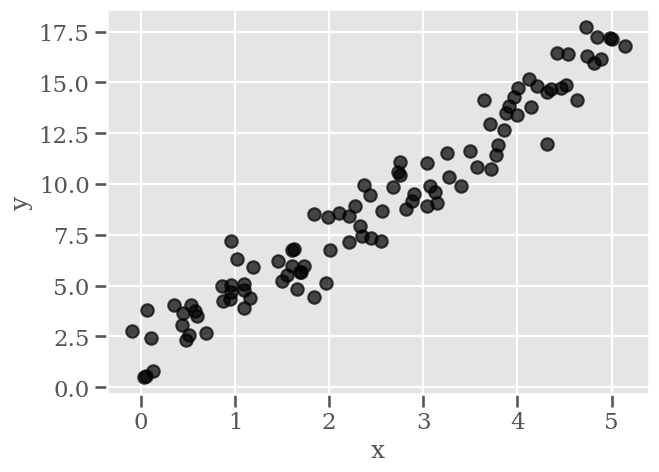

In [4]:
# use for interactive plots
#%matplotlib notebook

plt.scatter(data[:, 0], data[:, 1], c='k', alpha=0.7)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In the synthetic data shown above, x will be the input of our regression model that corresponds to a vector of 100 points distributed between 0 and 5. In order to represent all the predictor variables of the regression model ($\beta_0 = a$ and $\beta_0 = b$) into a single matrix we should first add a column of ones that accounts for the bias term or intercept of the linear fitting, $\beta_0$. Then, we can proceed by applying our analytical regression function defined above to predict the coefficients of the linear fitting as follows:

In [5]:
X_mat = np.vstack((np.ones(len(x)), x)).T
betas = analytical_linear_regression(X_mat,y)

# Let's print the two regression coefficients obtained 
# by the analytical fitting function
print("=========================")
print("Regression coefficients:")
print("=========================")
print(" ")
print("a = {} \nb = {}".format(betas[1],betas[0]))

Regression coefficients:
 
a = 2.976077882379381 
b = 1.5221883677506316


As you can see, the coefficients obtained by the analytical regression model are very close to the ones used to build the function that generated the training data points. Now let's plot the regression line to see how it fits to the original data points.

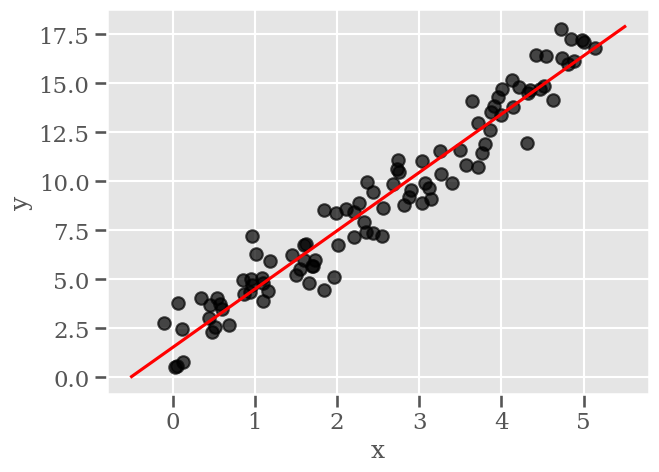

In [6]:
x_new = np.linspace(-0.5,5.5,100)

b_best, a_best = betas
y_fit = a_best *x_new + b_best

# use for interactive plots
#%matplotlib notebook

plt.scatter(data[:, 0], data[:, 1], c='k', alpha=0.7)
plt.plot(x_new, y_fit, c='red')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

That's awesome! Visually, our regression model seems to nicely fit all the data points. Indeed, the coefficients $a$ and $b$ obtained from our analytical regression function provide the optimal solution for the quadratic loss function given by equation 2. Now, plugging these optimal coefficients into the linear equation, we are able to predict any new outcome for a given input x with the smallest error. To better understand this result, let's calculate the loss function using the optimal coefficients as well as with others slightly different pairs of coefficients $a$ and $b$.

In [7]:
def residual_sum_squares(y_true, y_pred):
    rss = np.sum((y_true - y_pred)**2)/len(y_true)
    return rss

In [8]:
coefs = [(3,1.5), (2.9,1.6), (3.05,1.55), (a_best, b_best)]

prt_color = 'black'
print("===============================")
print("Residual sum of squares error:")
print("===============================\n")
for a,b in coefs:
    # To calculate the model predictions, we
    # are going to use the original x values
    y_pred = a * x + b
    # And we use the corresponding y value
    # to calculate the error
    rss = residual_sum_squares(y, y_pred)
    result = "Loss(a={:.2f},b={:.2f}) ---> {:.4f}".format(a,b,rss)
    if (a == a_best) and (b == b_best):
        result = '\033[91m' + result
    print(result)

Residual sum of squares error:

Loss(a=3.00,b=1.50) ---> 1.1959
Loss(a=2.90,b=1.60) ---> 1.2186
Loss(a=3.05,b=1.55) ---> 1.2504
Loss(a=2.98,b=1.52) ---> 1.1933


As you can see, the tuple of optimal parameters $a$ and $b$ determined by the regression model provides the smallest error, even compared with the original $a=3.0$ and $b=1.50$ coefficients used to generate the training data. This is due to the gaussian noise added to the linear function.

📈 **Applying the linear regression model to a molecular dataset**

So far, so good! But you might be wondering how good such a simple linear regression model can be when applied to a more realistic and complex data set. In particular, we also know that, in many cases, the input data fed to the machine learning model is often multi dimensional; that is, we usually need several features to describe the system. This is typically the case when the observations in the data set are molecular or chemical structures.

Therefore, we are going to consider in the next examples how the linear ML models perform on a data set of diatomic molecules extracted from the paper [Phys. Chem. Chem. Phys., 2020, 22, 24191](https://pubs.rsc.org/en/content/articlelanding/2020/cp/d0cp03810e), by X. Liu *et al*. This data set contains 162 polar diatomic molecules where information on the both the equilibrium bond length, R$_e$, and the harmonic vibrational frequency, $\omega_e$ are provided to at least 139 molecules (see table 4 of the paper). A more complete database with spectroscopic properties of diatomic molecules can be found at https://rios.mp.fhi.mpg.de/. Let's start by reading the data using the [Pandas](https://pandas.pydata.org/docs/) library:

In [9]:
diatomic_mols_dataset = "https://raw.githubusercontent.com/maxjr82/RCTF2022/master/tutorial/data/diatomics_dipole.csv"
data = pd.read_csv(diatomic_mols_dataset)
data

Molecule  d (D)  Re (Å)  omega (cm-1)
0       AgBr  5.620   2.393         247.7
1       AgCl  6.080   2.281         343.5
2        AgF  6.220   1.983         513.5
3        AgH  2.860   1.618        1759.9
4        AgI  4.550   2.545         206.5
..       ...    ...     ...           ...
157       WN  3.770   1.670           NaN
158      YbF  3.910   2.016         501.9
159       YF  1.820   1.926         631.3
160       YO  4.524   1.790         861.0
161      ZrO  2.551   1.712         969.8

[162 rows x 4 columns]

In [10]:
# Summary of the basic statistics
data.describe()

d (D)      Re (Å)  omega (cm-1)
count  162.000000  156.000000    139.000000
mean     3.724203    1.951091    922.595540
std      2.768439    0.574916    797.925643
min      0.004300    0.610000     98.900000
25%      1.737500    1.606750    366.750000
50%      3.099100    1.844500    669.800000
75%      4.592600    2.295500   1113.550000
max     11.690000    3.851000   4138.300000

The chemical diversity of the data set is evidenced by the large variability of the available molecular properties, as one can see in the statistical summary shown above. In the PCCP paper, the main goal is to train a machine learning model to predict the electric dipole moment of diatomic molecules given a data set composed of atomic and/or molecular properties. Thus, we will use the *dipole moment* as the target property to test our linear regression model.

Recalling your elementary chemistry courses, the dipole moment, $d$, of two charged particles is related to the equilibrium distance, $R_e$, between these particles by the simple linear equation

\begin{equation}
d = q \cdot R_e, 
\end{equation}

where $q$ is the effective charge. So, at first glance, you might expect that a linear model would be a good guess to predict the dipole moment of a new molecules, given the information of their equilibrium distances and atomic charges. However, this is not really the case, as we can deduce from a simple visual inspection of the correlation between the $R_e$ variable and the target values, dipole moment (see also Fig. 2 of the paper). Aside from some subset of the molecules that display a roughly linear relationship between $R_e$ and $d$, the data set has a large variability that is difficult to describe with a linear model.

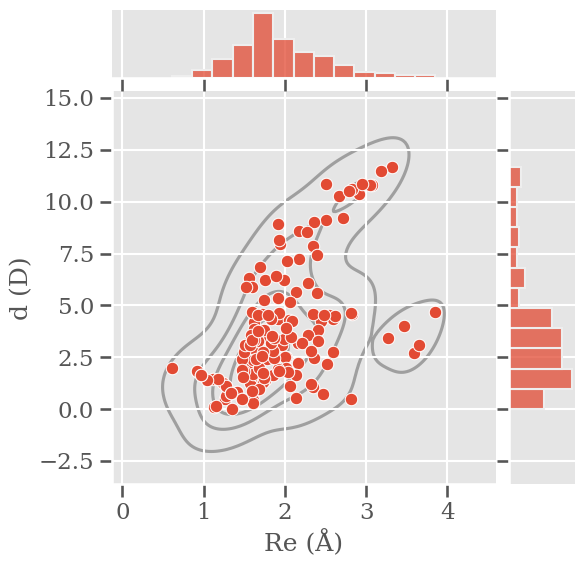

In [11]:
g = sns.jointplot(data=data, x="Re (Å)", y="d (D)")
g.plot_joint(sns.kdeplot, color="k", zorder=0, levels=5, alpha=0.3)
plt.show()

<div class="alert alert-block alert-info">
<b>📊 Info:</b> The contour lines in the correlation plot above indicate the probability density estimate of the data distribution, analogous to a histogram but reflecting the data distribution in two dimensions. Note that there is a blob of five points with equilibrium bond distance Re varying in the range of 3-4 angstroms. According to the contour lines, these points might be interpreted as outliers since they are likely associated with a different distribution.
</div>

Anyways, the simple linear regression model, i.e. assuming that we have only one independent variable R$_e$, can still be used as a baseline to define some sort of lower bound for the expected accuracy of a machine learning model. In other words, by increasing the number of features to describe the molecules in the data set or, as we will see later, by considering more complex ML models (possibly adding nonlinearities), we should be able to get better predictions.

Before applying our linear regression function to fit the data, we need to make sure that the data set contains only numerical values (observations with missing values, for example, are not accepted as input to the function). The [info()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html) attribute of the pandas dataframe allows to check for missing values:

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Molecule      162 non-null    object 
 1   d (D)         162 non-null    float64
 2   Re (Å)        156 non-null    float64
 3   omega (cm-1)  139 non-null    float64
dtypes: float64(3), object(1)
memory usage: 5.2+ KB


As we can see, from a total of 162 instances (molecules) in the data set, only 156 have non-null values for the equilibrium bond distance R$_e$. So let's filter the data set to select only the 156 molecules having both the dipole moment and equilibrium distance:

In [13]:
data.isnull().sum()

Molecule         0
d (D)            0
Re (Å)           6
omega (cm-1)    23
dtype: int64

In [14]:
data = data[data["Re (Å)"].notnull()].copy()
data

Molecule  d (D)  Re (Å)  omega (cm-1)
0       AgBr  5.620   2.393         247.7
1       AgCl  6.080   2.281         343.5
2        AgF  6.220   1.983         513.5
3        AgH  2.860   1.618        1759.9
4        AgI  4.550   2.545         206.5
..       ...    ...     ...           ...
157       WN  3.770   1.670           NaN
158      YbF  3.910   2.016         501.9
159       YF  1.820   1.926         631.3
160       YO  4.524   1.790         861.0
161      ZrO  2.551   1.712         969.8

[156 rows x 4 columns]

The data set now contains the 156 rows corresponding to the molecules for which the R$_e$ values are available. To fit the data using our analytical linear regression model, we are going to use R$_e$ as input to the model (independent variable), while the dipole moment, d (D), will be used as the target, y.

In [15]:
x = data['Re (Å)'].values
y = data['d (D)'].values
X_mat = np.vstack((np.ones(len(x)), x)).T

# Getting parameters from the trained model
betas = analytical_linear_regression(X_mat,y)

print("=========================")
print("     Model parameters:   ")
print("=========================")
print(" ")
print("a = {} \nb = {}".format(betas[1],betas[0]))

     Model parameters:   
 
a = 2.696882778438374 
b = -1.5210571451913155


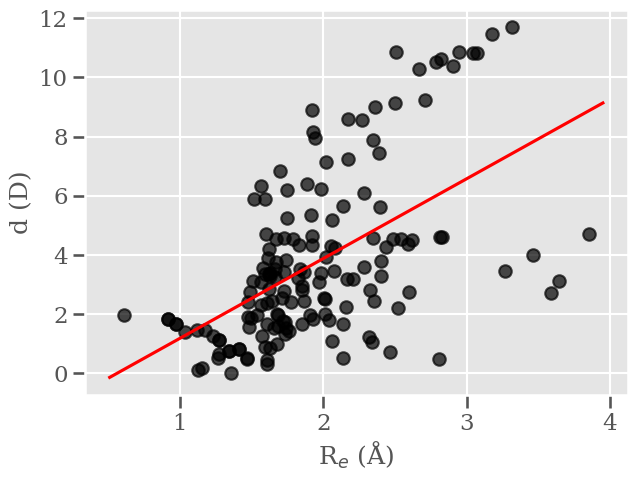

In [16]:
x_grid = np.linspace(x.min()-0.1, x.max()+0.1, 150)

b_best, a_best = betas
y_fit = a_best * x_grid + b_best

plt.scatter(data['Re (Å)'], data['d (D)'], c='k', alpha=0.7)
plt.plot(x_grid, y_fit, c='red')
plt.xlabel(r"R$_e$ (Å)")
plt.ylabel("d (D)")
plt.show()

Visually, it is clear that the linear model gives bad predictions for most of the points in the data set. In particular the dipole moments predicted by the red line tends to deviate more from the reference values (black dots) for molecules having a large equlibrium bond distance, $R_e \gt 2.5$ Å.

🎯 **Model evaluation**

In any case, it is important to define a metric that allows us to evaluate the performance of the model predictions with respect to the actual values, thereby providing a straightforward way to compare different models. The most popular [statistical error metrics used in regression problems](https://machinelearningmastery.com/regression-metrics-for-machine-learning/) are: (i) *Mean Squared Error (MSE)*, (ii) *Root Mean Squared Error (RMSE)* and (iii) *Mean Absolute Error (MAE)*. Each one of these metrics has its advantages and drawbacks, and the choice of a specific error metric depends on the regression problem at hand. Here we will use the RMSE as defined in the equation below to evaluate the quality of the simple linear regression model obtained for predicting the dipole moments of the diatomic molecules data set. 

\begin{equation}
RMSE = \sqrt{\frac{1}{n}\sum (y_i - \hat{y}_i)^2}
\end{equation}

<div class="alert alert-block alert-warning">
<b>📝 Important:</b> Note that, although error metric and loss function are mathematically similar,  they have different meanings and applications. While the former can be used in different forms to judge the performance of a given machine learning model (usually evaluated with respect to a test set), the loss function is used only once to define the optimization problem and train the model. 
</div>

In [17]:
def root_mean_squared_error(y_true, y_pred, print_error=True):
    squared_residuals = np.square(np.subtract(y_true,y_pred))
    mse = np.mean(squared_residuals)
    rmse = np.sqrt(mse)
    
    if print_error:
        print("*" * 22)
        print("  Model performance:  ")
        print("*" * 22 + '\n')
        print("   RMSE = {:.3f} D \n".format(rmse))
    
    return rmse

In [18]:
# Remember that x corresponds to the input data used in the training
y_model = a_best * x + b_best

rmse = root_mean_squared_error(y,y_model)

**********************
  Model performance:  
**********************

   RMSE = 2.332 D 



<a id='ex1'></a>
## Exercise 1: Outliers treatment

#### A. First, remove manually the five outlier points with respect to the equilibrium bond distance $R_e$ appearing in the scatterplot shown previously ($R_e$  > 3.0 Å  and d < 6.0 D). Then, refit the analytical linear model for the new data set without the outlier points and calculate the RMSE. Does the model performance improve compared to the full data set? Looking at the loss function of the linear model given by equation 2, can you explain why removing those specific five points of the data set impacts the model performance? 

#### B. In statistics, there is a more formal definition for [outliers](https://www.itl.nist.gov/div898/handbook/prc/section1/prc16.htm) which is based on the interquantile range of the data distribution. First, create a box plot for the dipole moment and the $R_e$ variable to visually identify existing outliers in both variables. Then, use the [quantile](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.quantile.html) attribute of Pandas dataframe to detect and remove (lower and upper) outlier points in the $R_e$ variable by considering a quantile threshold of 10%. Finally, after retraining the linear model for the outliers filtered data, calculate the RMSE to check the model performance. Is it better than what you got in item A? Now, if you remove the outliers only with respect to the dipole moment variable, how good is the model performance compared to the previous case ($R_e$ outliers)? List the molecules that correspond to outliers in either the dipole moment or the $R_e$ variable.

**Hint: Check this [thread](https://stackoverflow.com/questions/23199796/detect-and-exclude-outliers-in-a-pandas-dataframe) in stackoverflow to see some examples of Python code.**

As expected, the overall error produced by our linear regression model is considerably large, with the dipole moments predicted by the model deviating, on average, by about 2.3 Debye from the reference data. For example, the lowest RMSE value reported in the PCCP paper is 0.56 Debye, but the authors used a larger feature set (not only the R$_e$) and a much more complex ML model, so don't panic 😊. Indeed, such a large error of our model is not surprising given the apparent nonlinear correlation between the independent variable R$_e$, and the target d observed in the scatter plot. On the other hand, sometimes, it is possible to further improve the performance of a linear model by just increasing the number of features and later selecting the most appropriate ones to describe the system at hand. This process is often called [*feature engineering*](https://machinelearningmastery.com/discover-feature-engineering-how-to-engineer-features-and-how-to-get-good-at-it/).

**Feature engineering and multiple linear regression**

In our case, the easiest way to add more features to our data set of diatomic molecules is by querying information about the chemical properties of the constituent atoms directly from the periodic table. To do that, we are going to use a Python API called mendeleev (see the documentation at https://mendeleev.readthedocs.io/en/stable/).

In [21]:
import mendeleev as pt
from mendeleev.vis import periodic_table

In [22]:
periodic_table()

With mendeleev API, we can get all available information for a given chemical element through the attributes and methods of the Python object.

In [24]:
carbon, hydrogen = pt.element(['C', 'H'])
print(carbon, '---> mass = {}'.format(carbon.mass))
print(hydrogen, '---> mass = {}'.format(hydrogen.mass))

6 C Carbon ---> mass = 12.011
1 H Hydrogen ---> mass = 1.008


Here you can see the full information stored in the Element object created via mendeleev API: 

In [25]:
carbon

Element(
	abundance_crust=200.0,
 	abundance_sea=28.0,
 	annotation='density(graphite), ',
 	atomic_number=6,
 	atomic_radius=70.0,
 	atomic_radius_rahm=190.0,
 	atomic_volume=5.3,
 	atomic_weight=12.011,
 	atomic_weight_uncertainty=None,
 	block='p',
 	boiling_point=5100.0,
 	c6=46.6,
 	c6_gb=47.9,
 	cas='7440-44-0',
 	covalent_radius_bragg=77.0,
 	covalent_radius_cordero=73.0,
 	covalent_radius_pyykko=75.0,
 	covalent_radius_pyykko_double=67.0,
 	covalent_radius_pyykko_triple=60.0,
 	cpk_color='#c8c8c8',
 	density=2.2,
 	description='Carbon is a member of group 14 of the periodic table. It has three allotropic forms of it, diamonds, graphite and fullerite. Carbon-14 is commonly used in radioactive dating. Carbon occurs in all organic life and is the basis of organic chemistry. Carbon has the interesting chemical property of being able to bond with itself, and a wide variety of other elements.',
 	dipole_polarizability=11.3,
 	dipole_polarizability_unc=0.2,
 	discoverers='Known to the

In [26]:
for ir in carbon.ionic_radii:
    print(ir)

charge=   4, coordination=III  , crystal_radius= 6.000, ionic_radius=-8.000
charge=   4, coordination=IV   , crystal_radius=29.000, ionic_radius=15.000
charge=   4, coordination=VI   , crystal_radius=30.000, ionic_radius=16.000


In [93]:
# Let's load our original csv file again just to make sure
# we have the full data set to work with
data = pd.read_csv(diatomic_mols_dataset)
data[data['Molecule'].str.contains("D")]

Molecule   d (D)  Re (Å)  omega (cm-1)
19       CaD  2.5100   2.010           NaN
25       ClD  1.1033   1.275        2145.2
34       CrD  3.5100   1.663        1182.0
55       DBr  0.8230   1.415        1884.8
57        DF  1.8190   0.917        2998.2
64        ID  0.3160   1.609        1639.7
86       MgD  1.3180   1.730        1077.9
103       OD  1.6530   0.970        2720.2
127       SD  0.7571   1.341        1885.5
129      SeD  0.4800   1.470        1708.0

Note that our data set contains a couple of molecules having a deuterium atom in its composition, and this isotope of hydrogen is not available in the standard periodic table. Thus, in the feature builder function below, we will assume that the deuterium has the same chemical properties as hydrogen except for its mass.

In [94]:
# Remove rows having null values (freq. and Re columns)
data = data.dropna().reset_index().reset_index(drop=True)

In [74]:
def get_atom_properties(molecules):
    properties = ['atomic_number', 'mass', 'nvalence', 'electron_affinity', 'electronegativity',
                  'ionenergies', 'dipole_polarizability', 'covalent_radius']
    data = {}
    # Covalent radius is given in pm units (picometers).
    # Should be converted to angstrom: pm2ang = 0.01
    for mol in molecules:
        atom_labels = re.findall('[A-Z][^A-Z]*', mol)
        for suffix, label in zip(('a1','a2'), atom_labels):
            # Deuterium is not in the periodic table
            atom = label.replace('D','H')
            atom = pt.element(atom)
            for p in properties:
                try:
                    val = getattr(atom, p)
                    if p == 'mass' and label == 'D':
                        val = 2.0141018
                    if p == 'ionenergies':
                        val = val.get(1)
                    if p in ['nvalence', 'electronegativity']:
                        val = val()
                except:
                    val = np.nan
                key = p + '_' + suffix    
                data.setdefault(key, []).append(val)
    data = pd.DataFrame(data)            
    return data

In [95]:
df_atom_props = get_atom_properties(data['Molecule'])
df_atom_props.head()

atomic_number_a1   mass_a1  nvalence_a1  electron_affinity_a1  \
0                47  107.8682           11                 1.302   
1                47  107.8682           11                 1.302   
2                47  107.8682           11                 1.302   
3                47  107.8682           11                 1.302   
4                47  107.8682           11                 1.302   

   electronegativity_a1  ionenergies_a1  dipole_polarizability_a1  \
0                  1.93        7.576234                      55.0   
1                  1.93        7.576234                      55.0   
2                  1.93        7.576234                      55.0   
3                  1.93        7.576234                      55.0   
4                  1.93        7.576234                      55.0   

   covalent_radius_a1  atomic_number_a2     mass_a2  nvalence_a2  \
0               128.0                35   79.904000            7   
1               128.0                17   35.450000            7   
2               128.0                 9   18.998403            7   
3               128.0                 1    1.008000            1   
4               128.0                53  126.904470            7   

   electron_affinity_a2  electronegativity_a2  ionenergies_a2  \
0              3.363588                  2.96       11.813810   
1              3.612725                  3.16       12.967630   
2              3.401190                  3.98       17.422820   
3              0.754195                  2.20       13.598434   
4              3.059037                  2.66       10.451260   

   dipole_polarizability_a2  covalent_radius_a2  
0                  21.00000               114.0  
1                  14.60000                99.0  
2                   3.74000                64.0  
3                   4.50711                32.0  
4                  32.90000               133.0

Now let's check if there are null values in the atomic properties data set:

In [63]:
df_atom_props.isnull().sum()

atomic_number_a1            0
mass_a1                     0
nvalence_a1                 0
electron_affinity_a1        4
electronegativity_a1        1
ionenergies_a1              0
dipole_polarizability_a1    0
covalent_radius_a1          0
atomic_number_a2            0
mass_a2                     0
nvalence_a2                 0
electron_affinity_a2        0
electronegativity_a2        0
ionenergies_a2              0
dipole_polarizability_a2    0
covalent_radius_a2          0
dtype: int64

In total, we can see that there are five rows of the data set in which either the "electron_affinity_a1" or "electronegativity_a1" are not available in the mendeleev API. Let's check which molecules correspond to these null values.

In [51]:
ea_missing = df_atom_props[df_atom_props['electron_affinity_a1'].isnull()].index.tolist()
en_missing = df_atom_props[df_atom_props['electronegativity_a1'].isnull()].index.tolist()
mols_without_ea1 = data['Molecule'].loc[ea_missing].tolist()
mols_without_en1 = data['Molecule'].loc[en_missing].tolist()
print("Missing data for atom 1:")
print("========================\n")
print("Electron affinity ---> {}".format(mols_without_ea1))
print("Electronegativity ---> {}".format(mols_without_en1))

Missing data for atom 1:

Electron affinity ---> ['MgD', 'MgO', 'ThO', 'ThS']
Electronegativity ---> ['YbF']


Although one could try to gather the missing data from external sources, the information gained by keeping only five points is small. Thus, we do not expect a significant impact on model training and predictions. Therefore, to keep the tutorial simple, we will skip this process of filling the missing data (manually) and let it as an exercise for those interested to learn more about this step of the ML pipeline.

We can now import the molecular features available in the original data set into the new atomic properties data set. Then, using a bit of chemical intuition, we can play with the available features to combine some of them and express the atomic information in a more compact form.

In [96]:
df = df_atom_props.copy()
df['Re'] = data['Re (Å)']
df['omega'] = data['omega (cm-1)']
df['dipole'] = data['d (D)']
df = df.dropna()

Note that by combining some of the atomic features in the specific manner described below, we can incorporate permutation invariance into the new features. In other words, the new features become invariant by interchanging atoms A and B in each diatomic molecule. On the other hand, we lose the granularity of the feature vector in describing the properties of individual atoms, since the "[EA, IP, Polar, EN]_inv_ratio" type of features combine the information of both atoms into a single variable. In the PCCP paper, the atomic feature considered by the authors are not invariant with respect to atoms permutation, so they proposed an augmentation of the training data by exchanging the order of the elements, and then rename the columns of the corresponding atomic features.

In [97]:
# Combining features
df['nvalence_prod'] = df['nvalence_a1'] * df['nvalence_a2']
df['EA_inv_ratio'] = df['electron_affinity_a2'] / df['electron_affinity_a1'] + df['electron_affinity_a1'] / df['electron_affinity_a2']
df['IP_inv_ratio'] = df['ionenergies_a2'] / df['ionenergies_a1'] + df['ionenergies_a1'] / df['ionenergies_a2']
df['Polar_inv_ratio'] = df['dipole_polarizability_a1']/df['dipole_polarizability_a2'] + df['dipole_polarizability_a2']/df['dipole_polarizability_a1']
df['EN_inv_ratio'] = df['electronegativity_a2']/df['electronegativity_a1'] + df['electronegativity_a1']/df['electronegativity_a2']
df['Cov_radius_sum'] = (df['covalent_radius_a1'] + df['covalent_radius_a2']) * 0.01
df['mu'] = df['mass_a1']*df['mass_a2']/(df['mass_a1']+df['mass_a2'])

# Take the logarithm of the harmonic frequencies to put the values 
# into the same scale as the other variables.
df['log_omega'] = np.log(df['omega'].values)

# Remove redundant features
df = df.drop(['omega', 'mass_a1','mass_a2',
              'nvalence_a1', 'nvalence_a2',
              'ionenergies_a1','ionenergies_a2',
              'atomic_number_a1', 'atomic_number_a2',
              'covalent_radius_a1', 'covalent_radius_a2',
              'electron_affinity_a1','electron_affinity_a2',
              'electronegativity_a2', 'electronegativity_a1',
              'dipole_polarizability_a1','dipole_polarizability_a2'], axis=1)

After the features manipulation, we now have a fully numerical data set that can be used as input to the linear regression model. The data set has the following shape: 

In [38]:
display(df)

nvalence_a1  nvalence_a2     Re  dipole  EA_inv_ratio  IP_inv_ratio  \
0             11            7  2.393   5.620      2.970488      2.200628   
1             11            7  2.281   6.080      3.135143      2.295862   
2             11            7  1.983   6.220      2.995088      2.734513   
3             11            1  1.618   2.860      2.305603      2.352021   
4             11            7  2.545   4.550      2.775115      2.104391   
..           ...          ...    ...     ...           ...           ...   
133            5            5  1.566   3.070     -3.041667      2.618583   
134            5            6  1.592   3.355      3.142388      2.514015   
136            3            7  1.926   1.820     11.169056      3.159177   
137            3            6  1.790   4.524      4.969441      2.646908   
138            4            6  1.712   2.551      3.721402      2.539938   

     Polar_inv_ratio  EN_inv_ratio  Cov_radius_sum         mu  log_omega  
0           3.000866      2.185706            2.42  45.901899   5.512218  
1           4.032578      2.248065            2.27  26.681382   5.839187  
2          14.773882      2.547101            1.92  16.153373   6.241250  
3          12.284889      2.017169            1.60   0.998668   7.473012  
4           2.269914      2.103802            2.61  58.307284   5.330300  
..               ...           ...             ...        ...        ...  
133        11.841814      2.401215            2.05  10.986206   6.940222  
134        16.476014      2.584267            1.97  12.175186   6.918992  
136        43.338594      3.568828            2.27  15.653407   6.447781  
137        30.598754      3.174323            2.26  13.558998   6.758095  
138        21.179397      2.973094            2.17  13.611751   6.877090  

[134 rows x 11 columns]

In [98]:
df.columns

Index(['nvalence_a1', 'nvalence_a2', 'Re', 'dipole', 'EA_inv_ratio',
       'IP_inv_ratio', 'Polar_inv_ratio', 'EN_inv_ratio', 'Cov_radius_sum',
       'mu', 'log_omega'],
      dtype='object')

To get some intuition about the data, it is useful to analyze the data distribution as well as the pairwise relationship across all features of the data set. This type of plot can be easily obtained using the *seaborn* library. Let's do it!

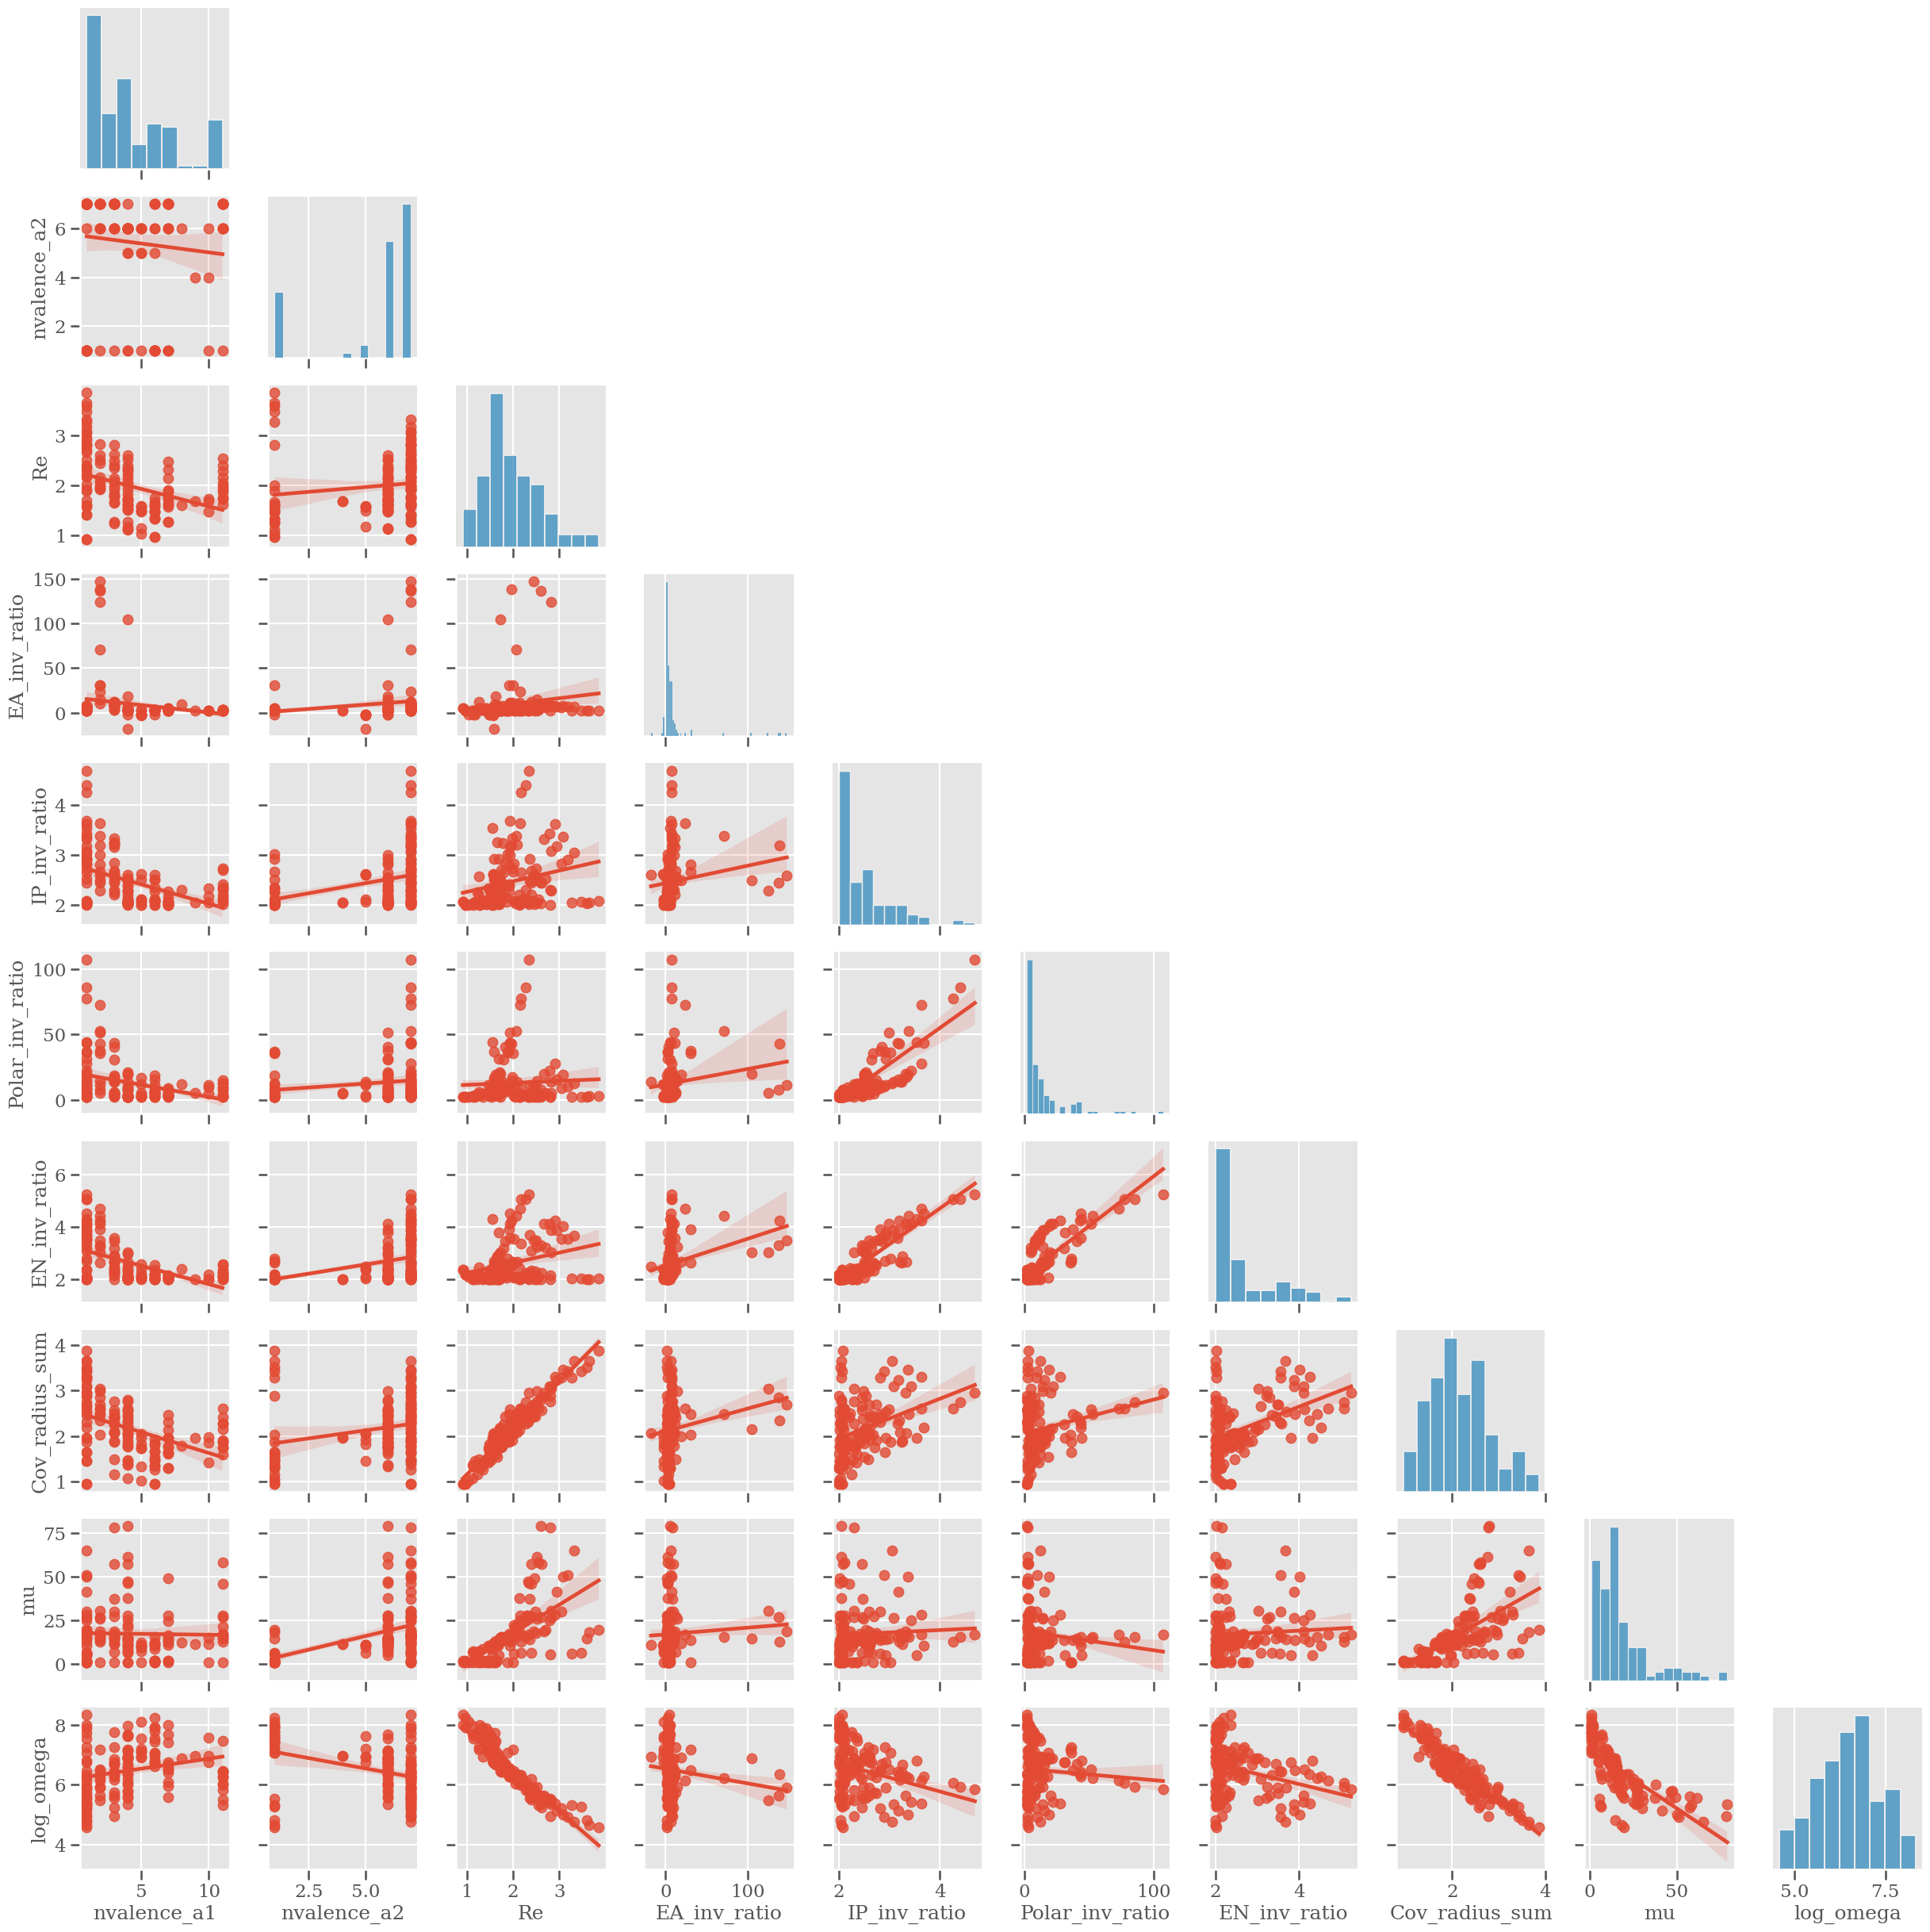

In [99]:
g = sns.PairGrid(df.drop(['dipole'],axis=1), diag_sharey=False, corner=True)
g.map_diag(sns.histplot)
g.map_lower(sns.regplot)
plt.show()

In [100]:
y = df['dipole'].values
x = df.drop(['dipole'], axis=1).values
#x = df['Re'].values

X_mat = np.hstack((np.ones((len(x),1)), x))

# Train the model for all data points
betas = analytical_linear_regression(X_mat,y)
print("=========================")
print("     Model parameters:   ")
print("=========================\n")
print(betas)
print("\nNumber of parameters = {}".format(len(betas)))

     Model parameters:   

[-2.95518441e+01  1.99425710e-01 -5.58601277e-02  3.31016791e+00
 -2.69020765e-02  1.39358697e+00 -1.09701953e-01  4.26691603e+00
  3.61127738e-01  2.15457528e-02  1.86822822e+00]

Number of parameters = 11


Let's take a look at the regression coefficient obtained for each independent variable (feature) in the data set.

In [101]:
variables = [col for col in df.columns if 'dipole' not in col]
coefficients = betas[1:].tolist()
df_vars = pd.DataFrame({'variable': variables, 'coefficient': coefficients})
df_vars

variable  coefficient
0      nvalence_a1     0.199426
1      nvalence_a2    -0.055860
2               Re     3.310168
3     EA_inv_ratio    -0.026902
4     IP_inv_ratio     1.393587
5  Polar_inv_ratio    -0.109702
6     EN_inv_ratio     4.266916
7   Cov_radius_sum     0.361128
8               mu     0.021546
9        log_omega     1.868228

According to the magnitude of the coefficients, it seems that the ratio of electronegativities, EN2/EN1, the equilibrium bond distance, Re, and the logarithm of the harmonic frequency, log_omega, are the most influencing features with a positive correlation. In other words, this means that the larger the value of these features, the larger should be the electric dipole moment of the molecule.

In [102]:
# Predict the dipoles using the trained model
y_pred = np.dot(X_mat, betas)

Now it's time for the truth! Let's check the performance of the multiple linear regression model after feature engineering by calculating the RMSE of the predicted dipole moments:

In [103]:
rmse = root_mean_squared_error(y,y_pred)

**********************
  Model performance:  
**********************

   RMSE = 1.315 D 



Just amazing! The feature engineering scheme based on the selection/manipulation of atom properties obtained from the periodic table was able to drop down the RMSE value of the simple linear regression model by about 1 Debye.

<div class="alert alert-block alert-warning">
<b>📝 Important:</b> Rigorously, the RMSE value computed above can not be directly compared to the one reported in the PCCP paper. Aside from other differences such as the feature set used in this tutorial and the ones considered in the PCCP paper, it is important to highlight that we have used the entire data set to train the model and estimate its performance, while in the PCCP paper the error estimate is obtained on a test set not used for training the model. To ensure that the trained model is able to generalize on unseen data, the common procedure is to first split the whole data set into the training and test sets, where the latter will be used only to estimate the model's accuracy.
</div>

<a id='ex2'></a>
## Exercise 2: Feature engineering

#### A. As mentioned earlier, linear models have the advantage of being easily interpretable, in the sense that the magnitude of the regression coefficients can be considered as a measure or score for the importance of the corresponding feature. With this in mind, create a bar plot of the importance of each feature in the data set in increasing order, where the importance score is given by the coefficient $\beta_i$ of a given feature divided by the norm of the $\mathbf{\beta}$ vector multiplied by 100. Then, refit the linear model by progressively increasing the number of features (columns) in the data set according to the order of importance score. Note that you should end up with ten different models. Finally, plot the RMSE values obtained for each one of the ten models (starting from the model that has only one feature, the one with the highest score) to see how the added features influence the model performance. 

#### B. Try to improve the model performance by proposing other atomic features. As an example, one could try to include information on the ionic radii of each atomic species as additional features to the data set. This information can be obtained using the mendeleev API, as demonstrated in the tutorial. However, note that the atoms may have more than ionic radii depending on the atomic coordination, so you should decide how to use these information. Report the RMSE values for each one of the data sets with different features you created.

<a id='grad_desc'></a>
## Gradient descent: solving linear regression iteratively

The matrix inversion operation as the one present in the analytical solution of the linear regression model (see equation 3) is computationally expensive, especially for large matrices. Alternatively, one can approach the exact solution of the linear regression problem iteratively by using a famous optimization method called [*gradient descent*](https://www.analyticsvidhya.com/blog/2020/10/how-does-the-gradient-descent-algorithm-work-in-machine-learning/) which does not require any matrix inversion operation.

As you have seen in the Calculus classes, the gradient is a derivative operator that, when applied to a function, gives a vector that points in the direction of the largest increase of the function. Thus, the main idea of the gradient descent algorithm is to start from some initial point in the parameters space and then take steps in the opposite direction of the gradient in order to decrease the value of the loss function at each iteration. In mathematical terms, the algorithm can be expressed as follows:

\begin{equation}
\beta^{k+1} = \beta^{k} - \eta \nabla J(\beta^{k}), \; k=0,...,p
\end{equation}

where *k* denotes the current step of the iterative loop and $J$ is the loss function to be minimized, which in the case of our linear regression model is the residual sum of squares shown in [equation 2](#eq2). By computing the gradient of our loss function explicitly, we end up with the following equation:

\begin{equation}
\beta^{k+1} = \beta^{k} - \eta \frac{2}{n}\sum_{i=1}^n (y_i - \hat\beta \mathbf{x}_i) \cdot \mathbf{x}_i, \; k=0,...,p
\end{equation}

Note that, in equation 6, we introduce a tuning parameter $\eta$, the so-called [*learning rate*](https://en.wikipedia.org/wiki/Learning_rate), that controls the step size taken in each iteration. This hyperparameter has a direct impact on the convergence of the algorithm such that a too-small learning rate usually leads to a slow convergence to the minimum, while a large learning rate may cause divergence problems.

In the video below, you can see a demonstration of the gradient descent algorithm in action when training a simple linear regression model. Since this is a one-dimensional problem, there are only two parameters to optimize, allowing us to visualize the convergence of the loss function to its minimum while changing the model parameters during the optimization process.

In [ ]:
from IPython.display import YouTubeVideo

vid = YouTubeVideo('-JkE8U62aN0', width=620, height=500)
display(vid)

Let's see how can we reformulate our linear regression algorithm using the gradient descent approach.

In [104]:
class LinearRegression():
    def __init__(self, lr=0.0002, max_iter=550000):
        self.learning_rate = lr
        self.n_iter = max_iter
        self.coef = None
    
    def y_hat(self, X, beta):
        return np.dot(X, beta)
    
    def loss(self, y_true, y_pred):
        rss = np.sum((y_true - y_pred)**2)/len(y_true)
        return rss
    
    def gradient_descent(self, beta, X, y_true, y_pred):
        grad = 2/len(y_true) * np.dot(X.T, (y_pred - y_true))
        beta = beta - self.learning_rate * grad
        return beta
    
    def fit(self, X, y):
        y = y.reshape(-1,1)
        X_mat = np.hstack((np.ones((len(X),1)), X))
        # Parameters initialization
        beta = np.zeros((X_mat.shape[1],1))
        #beta = np.random.uniform(-0.5,0.5,(X_mat.shape[1],1))
        if self.coef is not None:
            beta = self.coef.reshape(-1,1)
        
        for it in range(self.n_iter+1):
            y_pred = self.y_hat(X_mat, beta)
            rss = self.loss(y, y_pred)
            
            if it % 50000 == 0:
                print("Step {} ---> Loss = {}".format(it,rss))
            
            beta = self.gradient_descent(beta, X_mat, y, y_pred)
        
        self.coef = beta.flatten()

Now we can use the algorithm implemented above to train the model on our tuned data set. You can play a bit with the total number of iterations and learning rate to see if the algorithm converges to the exact solution.

In [ ]:
reg = LinearRegression(lr=0.0008, max_iter=200000)
reg.fit(x,y)

In [ ]:
# By rerunning the fit function, the algorithm will start from the last set of parameters, beta.
#reg.fit(x,y)

Finally, we can calculate the RMSE for the approximated linear regression model to check the performance and compare the result with the error obtained from the exact solution.

In [ ]:
X_mat = np.hstack((np.ones((len(x),1)), x))

betas_gd = reg.coef
# Use the trained model to predict the dipole moments
y_pred = np.dot(X_mat, betas_gd)

rmse = root_mean_squared_error(y,y_pred)

After 200k iterations, the RMSE value of the linear regression model obtained using the gradient descent approach is getting very close to the ground-truth error estimated via ordinary least squares (OLS) approach. Notice that, as the number of iterations increases, the gradient of the loss function approaches zero, so the model parameters $\beta$ are updated by a very little amount. This can make the convergence of the gradient descent algorithm quite slow, especially when a small learning rate is required. There are other flavors of the gradient descent approach (e.g., stochastic GD, mini-batch GD, etc) that can be used not only to accelerate convergence but also to deal with very large data sets in which the computation of the gradient for every single data point becomes too costly.

**To learn more about the gradient descent method, watch the videos provided below:**

- [Gradient Descent, Step-by-Step (StatQuest)](https://www.youtube.com/watch?v=sDv4f4s2SB8)
- [Linear Regression with Gradient Descent + Least Squares (excellent!)](https://www.youtube.com/watch?v=fkS3FkVAPWU&t=0s)
- [Gradient Descent For Machine Learning](https://www.youtube.com/watch?v=m-O-etFT_nU)

<a id='ridge_reg'></a>
## Ridge regression: introducing model regularization

A common problem faced in the feature engineering process when increasing the number of features in a given data set (the columns of $\mathbf{X}$) is that two or more features become strongly linearly related, an event known as *super-collinearity*. For example, in the case of our diatomic molecules data set, the atomic number and the mass of the corresponding element are features that should have some degree of collinearity; that is the larger the atomic number, the heavier the atom. Mathematically, one of the consequences of this collinearity is that the matrix appearing in the analytical solution of the least-squares problem (see [equation 3](#eq3)) may become singular (non-invertible) or its inverse may result in extremely large values. To understand this problem in practice, let us calculate the terms of equation 3 step-by-step for a small toy data set.

In [ ]:
np.random.seed(13)

n_points = 5
x1 = np.random.uniform(-1, 1, n_points)
noise = np.random.normal(0, 0.5, n_points)

# Generate data from a linear equation: y = a*x + b
a, b = (2.0, 1.0)
y = a*x1 + b + noise

# Let's create a new feature that is collinear to x
x2 = 0.1 * x1
x = np.hstack((x1.reshape(-1,1),x2.reshape(-1,1)))

# Add a column of ones to the x matrix
X_mat = np.hstack((np.ones((len(x),1)), x))

Recall that the closed-form solution for the least-squares problem is given by

\begin{equation*}
\hat{\beta} = (\mathbf{X}^T \cdot \mathbf{X})^{-1} \cdot \mathbf{X}^T \cdot \mathbf{y}
\end{equation*}

Let us start step-by-step:

**STEP 1**: calculate the inverse of the matrix product, $\mathbf{X}^T \cdot \mathbf{X}$ as follows:

In [ ]:
matrix_inv = np.linalg.inv(X_mat.T.dot(X_mat))
print("The inverse of the X.T@X matrix is:\n\n{}".format(matrix_inv))

**STEP 2**: calculate the dot product between the inverse of step 1 and the transpose of X_mat

In [ ]:
matrix_inv_dot = np.dot(matrix_inv, X_mat.T)
matrix_inv_dot

**STEP 3**: Finally, multiply the matrix obtained above by the vector of the response variable y to determine the regression coefficients, beta

In [ ]:
beta = np.dot(matrix_inv_dot, y)
beta

As you can see, the perfect collinearity between the variables x1 and x2 artificially introduced in the data set leads to large values in the inverse of the $X^T \cdot X$ matrix (in some cases, this matrix can be even singular), which in turn results in huge regression coefficients. In mathematical terms, we say that if the $X^T \cdot X$ matrix is not of full rank (i.e. there are linearly dependent columns) or if it is poorly conditioned (i.e. eigen values which are very close to zero) then the inversion can either be impossible, or numerically unstable. This is the scenario where [regularization](https://www.datacamp.com/community/tutorials/tutorial-ridge-lasso-elastic-net) comes to the rescue.

[**Ridge regression**](https://www.fs.usda.gov/treesearch/pubs/19260) is an example of regularized machine learning model where the loss function of the linear regression given by [equation 2](#eq2) is altered by adding a penalty term equivalent to the l2-norm (aka Euclidean norm) of the coefficients vector (feature weights). The role of this term is to introduce a constraint on the regression coefficients in order to control their magnitude such that the coefficients can not achieve arbitrarily large values after optimizing the penalized loss function (i.e., after the model training). Thus, ridge regression shrinks the coefficients and it helps to reduce the model complexity and multi-collinearity. With the ridge approximation, the loss function of the linear regression estimator now becomes

<a id='loss_ridge'></a>
\begin{equation}
\mathcal{L}_{Ridge}(\hat\beta) = \sum_{i=1}^n (y_i - \hat\beta \mathbf{x}_i)^2 + \lambda\sum_{j=1}^p \hat\beta_j^2 = ||y - \mathbf{X} \cdot \hat\beta||^2 + \lambda||\hat\beta||^2
\end{equation}

Similarly to the ordinary least squares problem, the set of optimal $\hat\beta^*$ parameters can be obtained by differentiating the ridge loss function 8 with respect to $\hat\beta$ and equating it to zero, which leads to the following analytical solution:

<a id='ridge_solution'></a>
\begin{equation}
\hat\beta_{ridge} = (\mathbf{X}^T\mathbf{X}+ \lambda \mathbf{I}^\prime)^{-1} \cdot (\mathbf{X}^T \mathbf{y})
\end{equation}

where $\mathbf{I}^\prime$ denotes a modified identity matrix with its first element replaced by zero. This modification is done to exclude the intercept $\beta_0$ from the ridge penalty term, since the purpose of the intercept term is to capture the mean of the data. Note that the main difference between equation 9 and 3 is the additional regularization term, $\lambda \mathbf{I}^\prime$. The magnitude of this term is controlled by the hyperparameter $\lambda$ that can assume any value from zero to positive infinity. It can be fine-tuned to achieve the optimum model complexity or equivalently the [best trade-off between the bias and variance](https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff). Note that if $\lambda = 0$ we recover the ordinary least squares solution given by equation 3. 

Let's first rewrite our analytical function for the ridge regression model by adding the regularization term as shown below:

In [105]:
def analytical_ridge_regression(X, y, lamb=0.05):
    n_cols = X.shape[1]
    I_mod = np.identity(n_cols)
    # Set the first 1 on the diagonal of the identity matrix to zero,
    # so the bias term (the intercept) is not be regularized
    I_mod[0,0] = 0
    beta = np.linalg.inv(X.T.dot(X) + lamb*I_mod).dot(X.T).dot(y)
    return beta

Using the function implemented above, we can now check by how much the performance of the ridge regression model may differ from the previous least squares solution when considering a small $\lambda$ parameter.

In [106]:
y = df['dipole'].values
X = df.drop(['dipole'], axis=1).values

X_mat = np.c_[np.ones((X.shape[0], 1)), X]
shirinkage = 0.1 

# Train the model for all data points
betas = analytical_ridge_regression(X_mat, y, lamb=shirinkage)
print("==================================")
print("  Ridge regression coefficients:  ")
print("==================================\n")
print(betas)
print("\nNumber of parameters = {}".format(len(betas)))

  Ridge regression coefficients:  

[-2.78020325e+01  1.93177891e-01 -6.85213255e-02  2.96448364e+00
 -2.66990987e-02  1.40004766e+00 -1.09636212e-01  4.22693367e+00
  4.89715839e-01  2.03730855e-02  1.69251963e+00]

Number of parameters = 11


In [107]:
# Predict the dipoles using the trained model
y_pred = np.dot(X_mat, betas)
rmse = root_mean_squared_error(y,y_pred)

**********************
  Model performance:  
**********************

   RMSE = 1.316 D 



The scikit-learn package is a very popular Python library used for general-purpose machine learning projects, which has, among many other methods, a quite efficient implementation of the [ridge regression algorithm](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html). So let's compare the overall prediction error obtained with our ridge regression function with the one we can obtain using the scikit-learn implementation.

In [108]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=shirinkage)
ridge_reg.fit(X, y)

print("==================================")
print("  Ridge regression coefficients:  ")
print("==================================\n")
print(ridge_reg.coef_)
print("")

y_pred = ridge_reg.predict(X)
rmse = root_mean_squared_error(y,y_pred)

  Ridge regression coefficients:  

[ 0.19317789 -0.06852133  2.96448364 -0.0266991   1.40004766 -0.10963621
  4.22693367  0.48971584  0.02037309  1.69251963]

**********************
  Model performance:  
**********************

   RMSE = 1.316 D 



As expected, the RMSE estimate obtained for the ridge regression model is slightly larger than the error obtained via the OLS approach (RMSE = 1.316 D), since the regularization term limits the possible values of the coefficients vector $\hat\beta$. Now we come to the question of *how to find the optimal value of the hyperparameter $\lambda$*?

<a id='ex3'></a>
## Exercise 3: Understanding regularization

#### To better understand the effect of regularization in ridge regression, fit the linear model by varying the shirinkage $\lambda$ hyperparameter between 0 and 100. Then, plot the value of the $\beta$ coefficient obtained for each feature (ten lines in total) as a function of the hyperparameter $\lambda$. What features look more sensible to changes in $\lambda$ value? Finally, plot the RMSE value as a function of $\lambda$. Which range of $\lambda$ values would be more reasonable to consider?

**Hyperparameter optimization and model selection**

In machine learning, a [hyperparameter](https://machinelearningmastery.com/difference-between-a-parameter-and-a-hyperparameter/) is an external variable whose value is used to control the learning process and improve model generalization. Since its value can not be estimated by fitting the machine to the training data, one generally resorts to some sort of "manual" search on a pre-defined grid of possible values to try to determine the optimal hyperparameter for a given problem. In this tuning process, it is important to ensure that the trained machine is capable of generalizing the learning to new instances which it has never seen before. The first step towards this goal is to split the data into the so-called train and test sets. While the former can be used for both model parameters optimization (training process) and hyperparameter tuning, the testing data is held out for evaluation of the final model to gauge its ability to generalize. This train-test splitting process is demonstrated from scratch in the code cell below:

In [109]:
n_train = 114
# Randomly select n_train observations for training
df_train = df.sample(n_train).copy()
idx_train = df_train.index.tolist()
# The remaining data points will be separated for testing
df_test = df.drop(idx_train).copy()
idx_test = df_test.index.tolist()

print("------------------------------------------")
print("       Observations     |     Features    ")
print("------------------------------------------")
print("Train       {}         |        {}".format(*df_train.shape))
print("Test         {}         |        {}".format(*df_test.shape))

------------------------------------------
       Observations     |     Features    
------------------------------------------
Train       114         |        11
Test         20         |        11


In principle, we could now use the training set (100 points) to search in the hyperparameter space for the best $\lambda$ value and also fit the ridge regression model to the same data. However, if the full training data is used for both tasks, one may end up with a hyperparameter that is too much adjusted to the training data, since in this case, there is no extra data left out from the training to truly evaluate the model performance. To mitigate this problem, we further split the training data into sub-training and validation sets, where the latter usually contains only a small fraction of the full training data (80:20 is a common choice for the splitting ratio); then, the error metric calculated on the validation set is used as a guide to select the optimal hyperparameter. 

In addition, the model evaluation should be statistically robust with respect to changes in the training and validation sets which means that every time we select a different set of data points to train and evaluate the model on the validation set, the estimated error will be different as well. Basically, we would like to reduce the probability of selecting a "good" model by chance just because we have luckily selected a set of points for which the model performs better. This is particularly important when the training and validation sets are rather small. In this case, one possible way to alleviate the bias problem in the model selection is to use a resampling method called [*repeated hold-out*](https://arxiv.org/pdf/1811.12808.pdf). The procedure can be divided into the following steps: 

    1. select one value for the hyperparameter in the pool of candidates;
    2. randomly split the available dataset into sub-training and validation sets;
    3. fit the model on the sub-training set, and use the fitted model to predict the the
       responses for the observations in the validation set; 
    4. estimate the error rate using the validation set as reference data;
    5. repeat steps 2-4 a certain number of times to calculate the average of the validation error 
       for the same hyperparameter value;
    6. go back to step 1 and select the next hyperparameter value.
    
These steps are implemented in the function below. For more details about different statistical approaches used in supervised learning to perform model selection and hyperparameter tuning, check out this review article: https://arxiv.org/pdf/1811.12808.pdf.

In [110]:
def hyperopt(X_train, y_train, split_ratio=0.7, n_repeats=50, param_range=(0,3)):
    
    n_samples = X_train.shape[0]
    n_subtrain = int(np.rint(n_samples * split_ratio))
    indices = np.arange(0,n_samples)
    results = {'lambda': [], 'average rmse': [], 'std rmse': []}
    lambda_grid = np.random.uniform(*param_range, size=30)    
    for l in lambda_grid:
        error_list = []
        for n in range(n_repeats):
            np.random.shuffle(indices)
            ind_subtrain = indices[0:n_subtrain-1]
            ind_valid = indices[n_subtrain:]
            X_subtrain, y_subtrain  = X_train[ind_subtrain], y_train[ind_subtrain]
            X_valid, y_valid = X_train[ind_valid], y_train[ind_valid]
            betas = analytical_ridge_regression(X_subtrain,y_subtrain,lamb=l)
            y_pred = np.dot(X_valid, betas)
            rmse = root_mean_squared_error(y_valid,y_pred, print_error=False)
            error_list.append(rmse)
        avg_error = np.mean(error_list)
        std_error = np.std(error_list)
        results['lambda'].append(l)
        results['average rmse'].append(avg_error)
        results['std rmse'].append(std_error)
    return results    

Note that for ridge regression, an additional data processing step is required before feeding the data into the model. In general, when regularization is applied to a (linear) regression model, the scale of the independent variables (features) influences how much regularization will be applied to a specific variable. In other words, if two independent variables have different scales, they will contribute differently to the penalized terms because the penalization term is a sum of squares of all the coefficients. To avoid such kind of problem, very often, each feature of the $\mathbf{X}$ input matrix is scaled by the [*z-score*](https://en.wikipedia.org/wiki/Standard_score) such that the independent variables are mean-centered and have variance 1. This procedure is demonstrated in the cell below.

In [111]:
y = df_train['dipole'].values
X = df_train.drop(['dipole'], axis=1).values

# Let's compute the mean and standard deviation to apply the 
# standardization on the features
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X_scaled = (X - X_mean)/X_std

X_mat = np.c_[np.ones((X_scaled.shape[0], 1)), X_scaled]

In [112]:
rrg_errors = hyperopt(X_mat, y, split_ratio=0.70, n_repeats=1000, param_range=(0,2))

Here we store the error metrics as a function of the hyperparameter values in a data frame object for further analysis.

In [113]:
rrg_errors = pd.DataFrame(rrg_errors)
rrg_errors = rrg_errors.sort_values(by='lambda')
rrg_errors.head()

lambda  average rmse  std rmse
0   0.000851      1.502151  0.218390
26  0.021450      1.508929  0.241678
22  0.105029      1.496547  0.220248
25  0.157740      1.518819  0.233661
21  0.177739      1.506212  0.241493

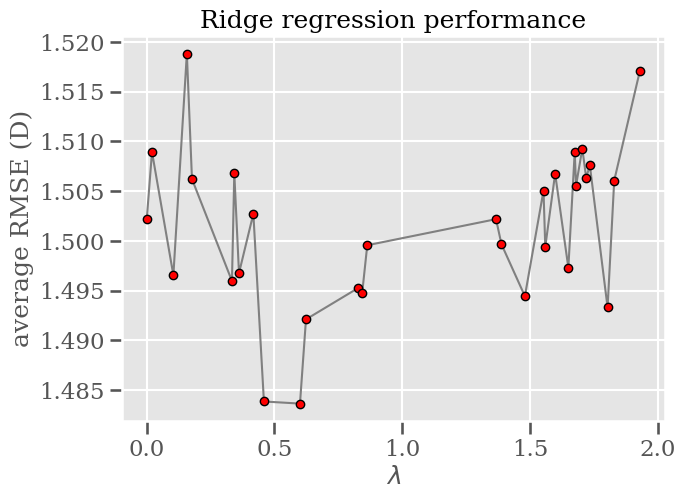

In [114]:
plt.title("Ridge regression performance")
plt.plot(rrg_errors['lambda'], rrg_errors['average rmse'], 'o-', color='gray', markersize=6, 
         markeredgecolor='black', markerfacecolor='red', linewidth=1.5)
plt.xlabel(r"$\lambda$")
plt.ylabel(r"average RMSE (D)")
plt.show()

As you can see in the curve above, it is possible to find a $\lambda$ value for which the average RMSE is minimum. This is going to be the optimal hyperparameter according to the hold-out random search procedure implemented in the hyperopt function.

In [115]:
opt_lambda = rrg_errors.sort_values(by='average rmse').head(1).values[0,0]
opt_lambda = np.round(opt_lambda, 3)
print("The optimal lambda is {}".format(opt_lambda))

The optimal lambda is 0.6


Finally, we can retrain the ridge regression model on the full training data using the optimal $\lambda$, and then use the trained model to predict the dipole moment for the instances of the test set. By comparing the predictions with the actual values of the dipole moment available in the test set, we can estimate the general predictive performance of our model.

In [116]:
betas = analytical_ridge_regression(X_mat, y, lamb=opt_lambda)
y_test = df_test['dipole'].values
X_test = df_test.drop(['dipole'], axis=1).values
# We need to apply the same standardization to the test set
X_test = (X_test - X_mean)/X_std
X_mat_test = np.hstack((np.ones((len(X_test),1)), X_test))

y_pred = np.dot(X_mat_test, betas)
rmse = root_mean_squared_error(y_test, y_pred)

**********************
  Model performance:  
**********************

   RMSE = 1.312 D 



Let's take a look at the distribution of the residuals for both training and test sets to see which molecules have the largest error.

In [117]:
mols_test = data['Molecule'].loc[idx_test].values
df_resid_test = pd.DataFrame({'Molecule': mols_test, 'y_pred': y_pred, 'y_true': y_test,
                              'dataset': np.repeat('test', len(idx_test))}) 

Now we need to calculate the predictions for the training dataset and append these information together with the reference dipole moments and the molecule identifier into the df_residuals dataframe object created above.

In [118]:
# Let's first calculate the predicted dipoles and the overall RMSE error for the training set
y_pred = np.dot(X_mat, betas)
rmse = root_mean_squared_error(y, y_pred)

**********************
  Model performance:  
**********************

   RMSE = 1.329 D 



In [119]:
mols_train = data['Molecule'].loc[idx_train].values
df_resid_train = pd.DataFrame({'Molecule': mols_train, 'y_pred': y_pred, 'y_true': y,
                               'dataset': np.repeat('train', len(idx_train))})
df_residuals = pd.concat([df_resid_train, df_resid_test], ignore_index=True)
df_residuals

Molecule    y_pred  y_true dataset
0       TlCl  3.627022  4.5429   train
1        NaF  8.716603  8.1558   train
2         IF  1.986774  1.9480   train
3        PtO  2.562333  2.7700   train
4        HBr  1.170730  0.8272   train
..       ...       ...     ...     ...
129      SeF  1.951438  1.5200    test
130       SF  1.693060  0.8700    test
131      SnO  2.613025  4.3200    test
132      SnS  2.637256  3.1800    test
133      TiO  2.673087  3.3400    test

[134 rows x 4 columns]

In [120]:
import plotly.express as px
import plotly.graph_objects as go

x = y = np.arange(0,13)
colors = ['rgba(200,155,10,0.4)', 'rgba(165,42,42,1.0)']

fig = px.scatter(df_residuals, x="y_true", y="y_pred", color="dataset", symbol="dataset",
                 labels={"y_true":"Target dipole (D)", "y_pred":"Predicted dipole (D)"},
                 marginal_x="box", marginal_y="box", title="Error analysis",
                 hover_data={'Molecule':True, 'dataset':False},
                 color_discrete_sequence = colors)

fig.add_trace(go.Scatter(x=x, y=y, mode="lines",
              line=go.scatter.Line(color="gray"),
              showlegend=False))

fig.update_layout(
    hoverlabel=dict(
        bgcolor="white",
        font_size=16,
        font_family="Rockwell"
    )
)

fig.update_traces(marker=dict(size=9, line=dict(width=1.5, color='rgba(47,79,79,0.8)')),
                  selector=dict(mode='markers'))

fig.update_xaxes(showspikes=True, spikecolor="black", spikethickness=1.5, 
                 spikesnap="cursor", spikemode="across")
fig.update_yaxes(showspikes=True, spikecolor="black", spikethickness=1.5)
fig.update_layout(spikedistance=1000, hoverdistance=500)

fig.show()

<div class="alert alert-block alert-info"> 
    <b>📌 Info: </b> 
    It is important to note that the values of the target variable, dipole moment, are not equally distributed in the full data set. This means that the probability of randomly selecting a molecule with a large dipole moment ($d \geq 7.0 D$) for the test data set is not the same as for a molecule having a moderate to small dipole moment. Consequently, some values of the dipole moment can be undersampled leading to an imbalanced distribution on the test set that may not replicate the distribution of real-world data. One way to solve this problem is to use an <a href="https://scottclowe.com/2016-03-19-stratified-regression-partitions/"> stratified sampling </a> with respect to the dipole moment variable when partitioning the data into the training and test sets.
</div>

For further details about ridge regression, watch the videos below:

- [Ridge Regression for Beginners! (Stemplicity)](https://www.youtube.com/watch?v=OEU22e20tWw)
- [Regularization | Regularized Linear Regression (by Prof. Andrew Ng)](https://www.youtube.com/watch?v=qbvRdrd0yJ8)
- [Statistical Machine Learning Part 9 - Ridge regression](https://www.youtube.com/watch?v=CFXYcn16meE)

<a id='ex4'></a>
## Exercise 4: Learning curve and data splitting

#### A. In the previous example, we have selected 114 points to train the ridge regression model, while 20 data points were kept aside for testing the model performance. While it is generally expected that the model performance improves as more data is provided for training, it is not intuitive or straightforward to know which training set size and splitting into the validation set should provide the best tradeoff between the computational cost and predictive performance of the trained model on unseen data. Thus, it is a common task in the machine learning pipeline to build the [learning curve](https://www.dataquest.io/blog/learning-curves-machine-learning/) for a given model, which provides a way to monitor the evolution of the error scores (on both training and test sets) as the training set size increases. In this exercise, you should plot the learning curve for the ridge regression model, repeating the training process with hyperparameter optimization varying the training set size from 30 to 110 with steps of 20. The size of the test set should be kept fixed with 20 samples. The plot of the learning curve should contains two different lines, one for the RMSE values computed on the training set and another one for the testing set. A similar plot is shown in the inset of Figure 3 of the PCCP paper.

#### B. For small training sets, it is intuitive to expect that the model performance is quite sensitive to the particular points selected to fit the model. This can be even more problematic if the training data has a skewed distribution or outliers. Since our diatomic molecules data set fits well in this scenario, it is important to determine the variance of the model predictions (i.e., the uncertainty) as we randomly select different sets of data points for training the model. To this end, you should repeat the data splitting process with 104 samples for training and the remaining 30 points for testing several times (try at least 100) and retrain the model for every new split. After each model training, compute the RMSE values for the testing set and store all results in a list. In this case, use the same optimal $\lambda$ hyperparameter found in the tutorial. Then, plot the histogram of the RMSE values and calculate both the mean and standard deviation. This latter will give a measure of the model's uncertainty. Can you propose a better scheme for the data splitting that may reduce the model uncertainty?

<a id='nonlinear_methods'></a>
# Non-linear machine learning methods

So far, we have restricted the hypothesis space of the machine learning models to the set of linear functions, which means that we assume a linear relationship between the input features and the target variable. In this case, the learning task consists of finding the optimal set of coefficients for those linear functions. As we have seen in previous examples, it is possible to improve the performance of the linear models by expanding the set of features that describe the instances of the data set. This involves the feature engineering component of the machine learning pipeline. However, when considering linear models, it seems that the prediction error for the dipole moments of the diatomic molecules data set has a lower bound of about 1.0 - 1.2 D. To drop-down this error, one may try to change another component of the ML pipeline, which is the algorithm, by designing different models that go beyond the linear approximation. Here we will see one example of non-linear ML models from a class of nonparametric methods called [*kernel methods*](https://en.wikipedia.org/wiki/Kernel_method).

**For more details about kernel methods, check out the links provided below:**

- [The Kernel Trick (CodeEmporium)](https://www.youtube.com/watch?v=wBVSbVktLIY)
- [Kernel Methods from Bloomberg ML course (advanced)](https://www.youtube.com/watch?v=m1otj-SdwYw)

<a id='feat_map'></a>
## Feature maps: how to learn non-linear functions using a linear model

First of all, let us recap our feature engineering problem to pave the way to understand the concept of kernels as a nonlinear transformation. When we created new features by combining different atomic properties, in some sense we were introducing nonlinearities into the input feature vectors that describe the molecules in the data set. For example, the ratio of ionization energies "IP2/IP1" is non-linear with respect to primary variable "IP1". However, there is a more efficient and systematic way to embed non-linear representations into the feature vectors which consists of applying a **feature mapping function (or basis expansion)** $\phi$ : $X \rightarrow \mathbb{R}^d$ on the inputs $\mathbf{x}_1,...,\mathbf{x}_p$. In the case of linear regression, this transformation can be written as

\begin{equation*}
y=\mathbf{X} \cdot \mathbf{\beta} \rightarrow  y=\phi(\mathbf{X}) \cdot \mathbf{\beta}^{\prime}
\end{equation*}

where the number of coefficients $\mathbf{\beta}^{\prime}$ to be learned after the non-linear transformation $\phi$ is, in general, much larger than the in the original linear regression model. A typical example of such non-linear transformation is the [*polynomial feature map*](https://machinelearningmastery.com/polynomial-features-transforms-for-machine-learning/), which expands the input features into all polynomials up to degree $d$ including the respective products.

\begin{equation}
[1, x_1, ..., x_p] \xrightarrow{\phi} [1, x_1, ..., x_p, x_1^2, ..., x_p^2, ..., x_p^d, x_1 x_2, ..., x_{p-1} x_p]
\end{equation}

Considering as an example, the polynomial mapping of degree three ($d=3$) applied to an input data composed of a single feature ($p=1$), one would have

\begin{equation}
y=\beta_0 + \beta_1 x_1 \xrightarrow{\phi} y=\beta_0 + \beta_1 x_1 + \beta_2 x_1^2 + \beta_3 x_1^3
\end{equation}

The main goal of such a non-linear transformation is to map the inputs to a higher-dimensional space so that a linear model can still be used to learn the underlying patterns in the data. This is illustrated in the video below: 

In [ ]:
from IPython.display import YouTubeVideo

vid = YouTubeVideo('OdlNM96sHio', width=620, height=500)
display(vid)

To have an intuition on how the polynomial mapping works in practice, let us build some non-linear artificial data (with noise added) from scratch and use it as an example to test the ridge regression algorithm after applying the polynomial feature mapping.

In [134]:
def make_wave(n_samples=100):
    rnd = np.random.RandomState(51)
    x = rnd.uniform(-3, 3, size=n_samples)
    y_no_noise = (1.5*np.cos(2.0 * x) + 0.8 * x)
    y = (y_no_noise + rnd.normal(0, 0.4, size=len(x))) / 2
    X = x.reshape(-1, 1)
    return X, y

Then, we can check how good the ridge regression model is when applied to this non-linear data.

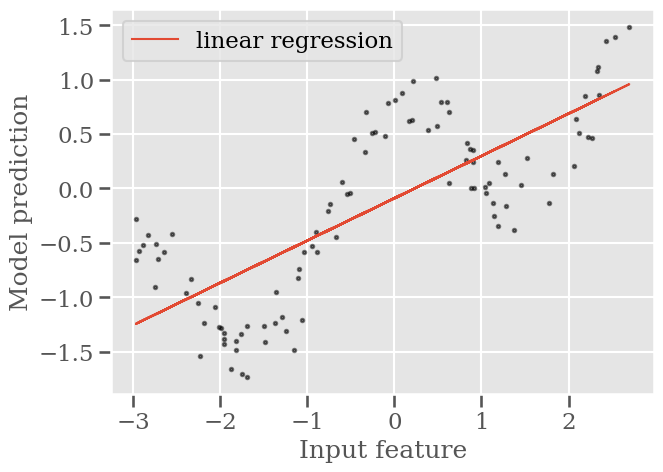

In [135]:
X, y = make_wave(n_samples=100)
X_mat = np.c_[np.ones((X.shape[0], 1)), X]

# Train the model for all data points
betas = analytical_ridge_regression(X_mat, y, lamb=0.2)
print("Ridge coefs.:", betas)
print("")

# Get model outputs for the training data
y_pred = np.dot(X_mat, betas)
rmse = root_mean_squared_error(y, y_pred, print_error=False)
print("RMSE = {:.4f}".format(rmse))

# Plot the results
plt.plot(X[:, 0], y_pred, label="linear regression", lw=1.5)
plt.scatter(X[:, 0], y, c='k', s=6, alpha=0.5)
plt.ylabel("Model prediction")
plt.xlabel("Input feature")
plt.legend(loc="best")
plt.show()

In the next, we will use the module [*PolynomialFeatures*](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) of the scikit-learn package to expand the original single feature of the data into polynomials of degree up to 8. 

In [136]:
from sklearn.preprocessing import PolynomialFeatures

# the "include_bias=True" option adds a feature that is constantly 1
poly = PolynomialFeatures(degree=8, include_bias=True)
poly.fit(X)
X_poly = poly.transform(X)
pd.DataFrame(X_poly, columns=poly.get_feature_names()).head()

1        x0      x0^2       x0^3       x0^4        x0^5        x0^6  \
0  1.0  1.054388  1.111735   1.172201   1.235955    1.303177    1.374054   
1  1.0 -2.731727  7.462332 -20.385053  55.686397 -152.120030  415.550378   
2  1.0 -0.940178  0.883935  -0.831056   0.781340   -0.734599    0.690654   
3  1.0  0.864118  0.746701   0.645238   0.557562    0.481799    0.416332   
4  1.0 -1.294722  1.676305  -2.170349   2.809999   -3.638167    4.710415   

          x0^7         x0^8  
0     1.448787     1.527585  
1 -1135.170150  3100.974843  
2    -0.649337     0.610493  
3     0.359760     0.310875  
4    -6.098678     7.896093

In [137]:
betas = analytical_ridge_regression(X_poly, y, lamb=0.2)
print("Ridge coefs.:", np.round(betas, 4))
print("")

y_pred = np.dot(X_poly, betas)
rmse = root_mean_squared_error(y, y_pred, print_error=False)
print("RMSE = {:.4f}".format(rmse))

Ridge coefs.: [ 7.0790e-01  4.5870e-01 -1.3494e+00 -4.3400e-02  3.7510e-01  1.2500e-02
 -3.1500e-02 -1.1000e-03  7.0000e-04]

RMSE = 0.1918


As we can see, the RMSE value was reduced by more than a half after applying the non-linear polynomial transformation to the data set. The price to pay for this improvement in the model performance, however, is that now the **algorithm needs to learn eleven parameters** (regression coefficients) instead of only one as in the linear regression problem applied to the original data set.

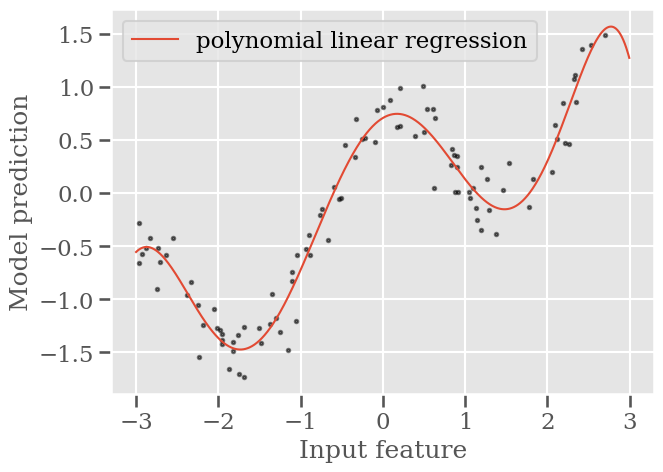

In [138]:
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)
line_poly = poly.transform(line)
y_pred = np.dot(line_poly, betas)

plt.plot(line, y_pred, label="polynomial linear regression", lw=1.5)
plt.scatter(X[:, 0], y, c='k', s=6, alpha=0.5)
plt.ylabel("Model prediction")
plt.xlabel("Input feature")
plt.legend(loc="best")
plt.show()

From the plot shown above, it is clear that the same ridge regression function we have used before was able to learn a complex non-linear function over inputs simply by adding extra features that unfold the non-linearities in the data. In fact, the more elements are in the feature vector, the more flexible the linear regression becomes and we can obtain better fits. This is a super-powerful technique that, in principle, could be used to learn models of any complexity. However, this polynomial transformation is computationally quite expensive, since we may need many new dimensions to fit the data. Indeed, if we rewrite the closed-form solution of ridge regression (see equation 9) after applying the feature map $\phi$,

\begin{equation}
\hat\beta = (\phi(\mathbf{X})^T \cdot \phi(\mathbf{X}) + \lambda \mathbf{I}^\prime)^{-1} \cdot (\phi(\mathbf{X})^T \mathbf{y}),
\end{equation}

we see that the size of the matrix $\phi(\mathbf{X})^T \phi(\mathbf{X})$ can easily become huge because the number of dimensions added by the $\phi$ transformation increases polinomially ($p^d$) with the size $p$ of the input space. The question now is can we use the feature map in a more efficient way? 

<a id='ex5'></a>
## Exercise 5: The polynomial feature map

#### Apply the polynomial features generator of scikit-learn as described in the example above to the diatomic molecules dataset first using only the original features ($R_e$ and $\omega$) and then considering the data set with atomic features included. Consider different degrees for the polynomial transformation ranging from 2 to 5. Then, training the ridge regression model (using scikit-learn or our analytical function) on the training data and evaluate the model performance by computing the RMSE on the testing set. Finally, plot the RMSE values as a function of the polynomial degree. Note that you should have two different curves, one for the polynomial transformation applied to the original feature set, and another one for the augmented feature set with atomic properties. Does the polynomial feature map help in providing better fits with a linear regression model?

<a id='kernel_trick'></a>
## The kernel trick

The [*kernel trick*](https://mlweb.loria.fr/book/en/kerneltrick.html) provides a convenient solution to the problem stated above and it relies on two observations:

- many linear ML algorithms can be expressed using only dot products between inputs, $\mathbf{X}^T\mathbf{X}$ which can then be translated into dot products in some high-dimensional space called feature space, $\phi(\mathbf{X})^T\phi(\mathbf{X})$;
- one can use functions called kernels that take two feature vectors as input and return a number that is equivalent to evaluate the dot product between these vectors in feature space.

To better understand what the kernel trick means in practice, consider the second order polynomial mapping applied on a two-features data set as follows:

\begin{equation*}
\phi: \begin{bmatrix} \mathbf{x}_1 & \mathbf{x}_2 \end{bmatrix}^T \mapsto \begin{bmatrix} \mathbf{x}_1^2 & \sqrt{2}\mathbf{x}_1\mathbf{x}_2 & \mathbf{x}_2^2 \end{bmatrix}^T.
\end{equation*}

Now, if we compute the a dot product in the feature space induced by the mapping $\phi$ we get

\begin{align*}
\big\langle \phi(\mathbf{x}),\phi(\mathbf{x}^\prime) \big\rangle &= \Big\langle \begin{bmatrix} \mathbf{x}_1^2 & \sqrt{2}\mathbf{x}_1\mathbf{x}_2 & \mathbf{x}_2^2 \end{bmatrix}^T,\begin{bmatrix}
\mathbf{x}_1^{\prime2} & \sqrt{2}\mathbf{x}_1^{\prime}\mathbf{x}_2^{\prime} & \mathbf{x}_2^{\prime2} \end{bmatrix}^T \Big\rangle \\ 
&=  \mathbf{x}_1^2 {\mathbf{x}_1^\prime}^2 + 2 \mathbf{x}_1\mathbf{x}_2 \mathbf{x}_1^\prime \mathbf{x}_2^\prime + \mathbf{x}_2^2 {\mathbf{x}_2^\prime}^2 \\ & =  (\mathbf{x}_1\mathbf{x}_1^\prime + \mathbf{x}_2\mathbf{x}_2^\prime)^2 \\ & = \big\langle \mathbf{x},\mathbf{x}^\prime \big\rangle^2 = k(\mathbf{x},\mathbf{x}^\prime)
\end{align*}

Thus, the kernel trick allows us to replace the expensive computation of $\phi(\mathbf{x}_i)$ and $\phi(\mathbf{x}_j)$ by the kernel evaluation $k(\mathbf{x}_i, \mathbf{x}_j)$ that depends only on the feature vectors in the original space. This trick brings the computational advantage of providing a shortcut to compute distances between data points as if our data was living in a high-dimensional space. Because the evaluation of a kernel function involves computing the dot product in feature space, it can also be interpreted as a similarity measure for comparing vectors corresponding to a point $\mathbf{x}$ and training points $\mathbf{x}_i$ in high-dimensional space. So when $\mathbf{x}$ and $\mathbf{x}_i$ are similar the kernel will output a large value, and when they are dissimilar k will be small.

**Some popular kernel functions:**

- polynomial $\rightarrow K(\mathbf{x}_i, \mathbf{x}_j) = (\gamma \mathbf{x}_i^\top \mathbf{x}_j +c_0)^d$, reproduces the polynomial feature map
- gaussian or radial basis functions (RBF) $\rightarrow K(\mathbf{x}_i, \mathbf{x}_j) = \exp{ \left(\frac{-||\mathbf{x}_i - \mathbf{x}_j||_2^2}{2 \sigma^2} \right)} = \exp{ \left(-\gamma ||\mathbf{x}_i - \mathbf{x}_j||_2^2 \right)}$, where $||\, . ||_2$ denotes the $l_2$ vector norm
- sigmoid $\rightarrow K(\mathbf{x}_i, \mathbf{x}_j) = \tanh( \gamma \mathbf{x}_i^\top \mathbf{x}_j + c_0)$

<a id='krr'></a>
## Kernel Ridge Regression (KRR)

As a rule of thumb, any linear ML algorithm whose loss function is expressed in terms of dot products $\mathbf{x}_i \cdot \mathbf{x}_j$ can be kernelized (i.e., converted into a nonlinear method) by simply replacing the dot products with $k(\mathbf{x}_i,\mathbf{x}_j)$. Although these dot products are not explicit in the ridge regression loss (see [equation 8](#loss_ridge)), it can be shown via [representer theorem](https://en.wikipedia.org/wiki/Representer_theorem) that the ridge loss admits a kernelized version expressed in the form

\begin{equation}
\mathcal{L}_{KernelRidge}(\hat\alpha,K) = ||y - \mathbf{K} \cdot \hat\alpha||^2 + \lambda||\mathbf{K}\hat\alpha||^2,
\end{equation}

where $\mathbf{K} \in \mathbb{R}^{nxn}$, $\mathbf{K}_{i,j} = k(\mathbf{x}_i,\mathbf{x}_j)$ is the *kernel matrix* between training samples, and $\alpha$ are the set of coefficients to be learned. As before, setting the gradient of $\mathcal{L}_{KernelRidge}$ with respect to $\alpha$ equal to zero yields an analytic solution for the regression coefficients:

\begin{equation}
\hat\alpha_{KernelRidge} = (\mathbf{K} + \lambda \mathbf{I})^{-1} \cdot \mathbf{y}
\end{equation}

The non-linear regression model defined by equations 13 and 14 is known as **kernel ridge regression** (or KRR for short). This model has a closed-form solution that is very similar to the one we obtained previously for ridge regression (see [equation 9](#ridge_solution)). One important difference to note is that the dot product $\mathbf{X}^T\mathbf{X}$ appearing in equation 9 is now replaced by a kernel matrix $\mathbf{K}$ which encodes the non-linear transformation of the input features to a high-dimensional space. In general terms, the KRR estimator can be simply viewed as a basis set expansion in the form:

\begin{equation}
\quad \hat f(\mathbf{x}) = \sum_{i=1}^n \, \alpha_i k(\mathbf{x}_i, \mathbf{x}),
\end{equation}

where the summation is over the training data points, $\mathbf{x}_i$, and $\mathbf{x}$ is some testing point for which we want to estimate the function value. Thus, all we need to do is:

   1. determine the optimal set of regression coefficients $\alpha_{i}$ via equation 14 for a given kernel function; 
   2. use these coefficients to calculate the weighted-sum of the kernel evaluations between the testing point $\mathbf{x}$ and every training point $\mathbf{x}_i$ in equation 15 to make a prediction.
    
These steps are implemented from scratch in a Python class below, but before getting there let us first get some intuition on how the KRR algorithm works by training the model "manually" on a quite small data set. To this end, we can play with the interactive example provided below, where the the gaussian kernel is used as an example in the basis set expansion of the KRR algorithm.

In [ ]:
@interact
def plot_kernel_ridge(sigma=(0.1,1.6,0.05),a1=(-1,1,0.1),a3=(-1,1,0.1),a5=(-1,1,0.1)):   
    xs = [-6.5,-4.1,-2.3,0,2.2,4.1]
    ys = [-0.63,0.20,-0.25,0.75,0.40,-0.15]
    alphas = [a1,0.25,a3,0.7,a5,-0.3]
    points = np.linspace(-10, 10, 200)
    f = [0]*200
    for a,x,y in zip(alphas,xs,ys):
        k = np.exp(-(points-x)**2/(2*sigma**2))
        f += a*k
        plt.plot(points, k, 'b-', alpha=0.4)
        plt.annotate("%0.2f" % (a), (x+0.1,y+0.01), fontsize=10, zorder=11)
    plt.plot(points, f, 'r-', lw=2)
    plt.grid("both")
    plt.scatter(xs,ys);

First, in the interactive plot shown above, there are six data points (red dots), and the learning task is to find a proper function that goes through these points. Also, because we are using the Gaussian kernel, we can see that there is one Gaussian function (blue curves) centered on each data point which represents our basis set. The width of the Gaussian function is controlled by the $\sigma$ hyperparameter, which basically defines how much influence the basis function of one point has over the other nearby points. This hyperparameter provides a way to control the complexity of our model. In general, wider Gaussian kernels will produce smoother functions, and the more the overlap between two Gaussian functions, the larger the similarity score outputted by the kernel. Finally, you can manually search for the best regression coefficients (basically, train the model) by sliding the buttons to select values for the a1, a3, and a5 coefficients.

In the next, we provide a from-scratch implementation of the KRR algorithm using Numpy. This KRR class has two different kernels available, the linear and Gaussian kernels. With our KRR implementation, we can now fit the diatomic molecules data set to predict dipole moments using more complex models. Let's see how it works.

In [ ]:
class KRR():
    def __init__(self, kernel='Linear', lamb=0.1, **kw):
        self.kernel = getattr(self, kernel)
        self.params = {'lambda': lamb, 'sigma': 0.01}
        for k, v in kw.items():
            self.params[k] = v
        self.train_x = None
        self.alpha = None
    
    def Linear(self, x1, x2):
        return x1 @ x2.T
    
    def Gaussian(self, x1, x2):
        dist = np.sum(x1**2, 1).reshape(-1, 1) + np.sum(x2**2, 1) \
               - 2*np.dot(x1, x2.T)
        return np.exp(-0.5 * dist / (self.params['sigma']**2))
    
    def fit(self, X, y):
        self.train_x = np.asarray(X)
        self.train_y = np.asarray(y).reshape(-1, 1)
        K = self.kernel(self.train_x,self.train_x)
        self.alpha = np.linalg.inv(K + self.params['lambda'] * np.eye(len(self.train_x))) @ self.train_y
    
    def predict(self, X):
        self.pred_x = np.asarray(X)
        K = self.kernel(self.pred_x, self.train_x)
        return K @ self.alpha

For comparison purposes, we will use the same train-test split (114:20) we applied before in the ridge regression example. Make sure that the code cell used to split the data was correctly executed.

In [ ]:
y_train, y_test = df_train['dipole'].values, df_test['dipole'].values
X_train, X_test = df_train.drop(['dipole'], axis=1).values, df_test.drop(['dipole'], axis=1).values

As a test case, let's first train the KRR algorithm using the linear kernel. It should yield an overall prediction error similar to the one obtained previously with the ridge regression model. First, note that we are not necessarily using the same regularization parameter as in the previous example. Second, the matrix $\mathbf{X}$ used as input in kernel ridge regression does not require the column of ones. So the prediction errors are expected to be slightly different between ridge regression and its kernelized formulation with a linear kernel.

In [ ]:
# define a KRR model with linear kernel.
krr_linear = KRR(kernel='Linear', lamb=0.1)
# fit this model using the training data
krr_linear.fit(X_train, y_train.reshape(-1, 1))

In [ ]:
# use the trained model to make prediction on the test set
y_pred = krr_linear.predict(X_test)
# estimate the model performance
rmse = root_mean_squared_error(y_test.reshape(-1,1), y_pred)

The RMSE value obtained above using the linear KRR model is probably slightly larger than the RMSE we found previously using ridge regression. This only confirms our expectations. Let's see if we can get better results using a more complex non-linear model, considering a Gaussian kernel function in the KRR algorithm.

In [ ]:
gauss_width = 75
regularizer = 0.0001
# define a KRR model with gaussian kernel.
krr_gauss = KRR(kernel='Gaussian', sigma=gauss_width, lamb=regularizer)
# fit this model using the training data
krr_gauss.fit(X_train, y_train.reshape(-1, 1))

In [ ]:
# use the trained model to make prediction on the test set
y_pred = krr_gauss.predict(X_test)
# estimate the model performance
rmse = root_mean_squared_error(y_test.reshape(-1,1), y_pred)

The *scikit-learn* package also provides a very efficient and more complete implementation of the [KRR algorithm](https://scikit-learn.org/stable/modules/generated/sklearn.kernel_ridge.KernelRidge.html). So we can use this package to confirm the results obtained with our implementation.

In [ ]:
from sklearn.kernel_ridge import KernelRidge

gamma = 1/(2*gauss_width**2) # check sklearn.metrics.pairwise.rbf_kernel documentation
krr = KernelRidge(kernel='rbf', gamma=gamma, alpha=regularizer)
krr.fit(X_train, y_train)
y_pred = krr.predict(X_test)
rmse = root_mean_squared_error(y_test, y_pred)

Cool! Our RMSE error perfectly matches the *scikit-learn* results. On the other hand, the RMSE value obtained with the Gaussian kernel is disappointingly large compared to the most simpler linear kernel. So what is going on here? First, remember that we had choosen an arbitrary value for the width of the Gaussian kernel, $\sigma$, This is actually a hyperparameter that needs to be tuned similarly to as we did for the regularization parameter of ridge regression. Indeed, as you saw in our interactive example for the toy data set, the shape of the fitting curve is quite sensitive to changes in the $\sigma$ parameter. Thus, there is still a chance of achieving much better performance with the KRR model by properly tuning its hyperparameters. Moreover, it is worth noting that the functional form of the kernel can also be considered a hyperparameter itself. So maybe a Gaussian kernel is not the best choice for this particular data set.

**Optimizing the kernel hyperparameters**

Let us follow the same recipe we applied before for the hyperparameter search of ridge regression, but now trying to optimize simultaneously both the width of the Gaussian kernel ($\gamma$ in the equivalent RBF kernel) and the regularization $\alpha$ to see if we can improve the performance of the KRR estimator. In this case, we will use a built-in function of scikit-learn called [*RandomizedSearchCV*](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html) which basically performs a random search for the optimal hyperparameter on a predefined grid of values similarly to the hyperopt function we implemented from scratch.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

gammas = np.random.normal(loc=gamma, scale=8e-6, size=200)
alphas = np.logspace(-6, -4, 100, base=10, endpoint=True)
krr_params = {'alpha': alphas, 'gamma': gammas}

krr_model = KernelRidge(kernel='rbf')
estimator = RandomizedSearchCV(krr_model, krr_params, cv=3, n_iter = 1000,
                               scoring='neg_root_mean_squared_error')
search = estimator.fit(X_train, y_train)

Once the calculation is finished, we can access the whole history of th randomized search as an attribute of the search object. Note that the number of rows in the data frame shown below corresponds to the number of iterations we have defined when instaciating the *RandomizedSearchCV* object. The column *params* is used to store a list of parameter settings as Python dictionaries for all the parameter candidates.

In [ ]:
opt_hist = pd.DataFrame(search.cv_results_)
opt_hist

The *search* object also stores the best score on the validation set and the corresponding hyperparameters settings as attributes of the object. 

In [ ]:
opt_sigma = np.sqrt(1/(2*search.best_params_['gamma']))
opt_alpha = search.best_params_['alpha']
rmse_min = search.best_score_*(-1)

print("Results of the hyperparameter search:")
print("-------------------------------------")
print("  Opt. Gaussian width ---> {:.5f}".format(opt_sigma))
print("  Opt. Regularization ---> {:.6f}".format(opt_alpha))
print("    Min. average RMSE ---> {:.4f} D".format(rmse_min))

The best regression model trained on the full training set using the optimal hyperparameters is also stored in the *search* object, and we can use it later to make predictions on new data.

In [ ]:
print(search.best_estimator_)

Finally, we can use the tuned KRR model to predict the dipole moments for the molecules in the test set, and then estimate the generalization error according to the RMSE metric. 

In [ ]:
# Call predict on the estimator with the best found parameters.
krr_best = search.best_estimator_
y_pred = krr_best.predict(X_test)
rmse = root_mean_squared_error(y_test, y_pred)

Usually, it is expected that the model performance significantly improves (on average) after optimizing the model hyperparameters, but this really depends on the method chosen to search for the optimal hyperparameters. Yet, there is the possibility of further improving the model by selecting a more appropriate kernel function, which we have not considered in this example. In the PCCP paper, for example, the authors have found that the [*rational quadratic kernel*](https://www.cs.toronto.edu/~duvenaud/cookbook/) provided the best performance in their experiments. This kernel is also available in the [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.gaussian_process.kernels.RationalQuadratic.html) library, and it can be used together with the *KernelRidge* function as a precomputed kernel.

<a id='ex6'></a>
## Exercise 6: Exploring different kernels

#### Use the KRR implementation of scikit-learn library to fit a KRR model to the diatomic molecutes data set augmented with atomic features by considering two different kernels: <br><br> (i) one of the built-in [kernels available](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.pairwise_kernels.html) in the function; <br><br> (ii) the rational quadratic kernel; this later must be provided to the KRR function as a precomputed kernel, which means that the kernel matrix must be computed beforehand and passed as input to the KRR function. <br><br>For each one of these cases, consider 104 points for training and 30 points for testing. Also, try to optimize the hyperparameters of the corresponding kernels using the randomized search algorithm. Report the RMSE evaluated on the testing set for each one of the kernels considered in the exercise. 

---